# Load Libraries

In [102]:
library(dplyr)
library(caret)
library(lattice)
library(ggplot2)
library(stats)
library(Hmisc)
library(car)
library(leaps)
library(outliers)
library(kknn)
library(knitr)
library(psych)
library(corrplot)
library(tidyverse)
library(cli)
library(devtools)
library(rpart)
library(pROC)
library(nnet)
library(foreign)
library(reshape2)
library(lattice)
library(ggplot2)
library(comprehenr)
library(gridExtra)
library(MASS)
library(aod)
library(e1071)
#library(factoextra)
#conda install -c conda-forge r-factoextra 
library(class)
library(randomForest)
library(rpart)
library(rpart.plot)
library(gbm)

# Load Data

In [103]:
setwd("~/Downloads/Datasets/7406/Project")

white <- read.csv(file = "winequality_white.csv", head = TRUE, sep=";")
red <- read.csv(file = "winequality_red.csv", head = TRUE, sep=";")

wine <- red
summary(wine)
head(wine)
str(wine)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
6  7.4          0.66             0.00        1.8            0.075    
  free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
6 13                  40                   0.9978  3.51 0.56      9.4    
  quality
1 5      
2 5      
3 5      
4 6      
5 5      
6 5

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


# Exploratory Data Analysis

In [104]:

nobs <- nrow(wine)
print(paste('White: ',dim(white)))
print(paste('Red:   ', dim(red)))
      
na_count <- sapply(wine, function(y) sum(length(which(is.na(y)))))
na_count
            

[1] "White:  4898" "White:  12"  
[1] "Red:    1599" "Red:    12"  


fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

# OUTLIERS

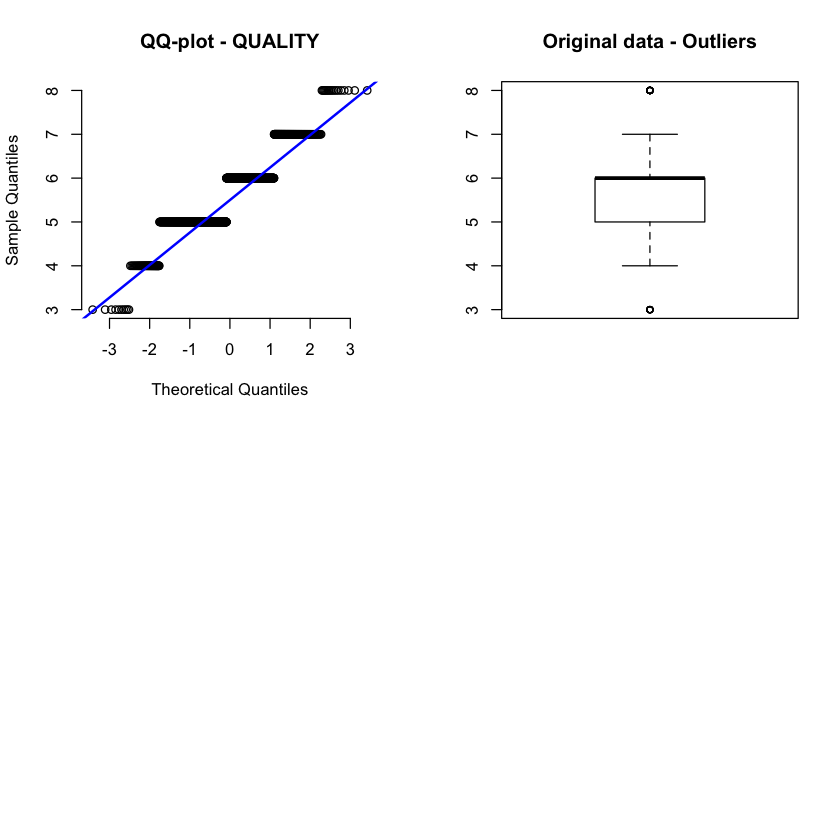

In [105]:
par(mfrow = c(2,2))
qqnorm(wine$quality, pch = 1, frame = FALSE, main = 'QQ-plot - QUALITY')
qqline(wine$quality, col = "blue", lwd = 2)
boxplot(wine$quality, main = 'Original data - Outliers')


In [106]:
grubbs.test(wine$quality, type =10)


	Grubbs test for one outlier

data:  wine$quality
G = 3.26414, U = 0.99333, p-value = 0.8626
alternative hypothesis: lowest value 3 is an outlier


Our dataset does not have any missing values. 

Our response variable "Quality" is a categorical one with the ranks from 1 to 10.
The range of values (min/max) across the variables does not require scaling or normalization. All predictors are numerical.


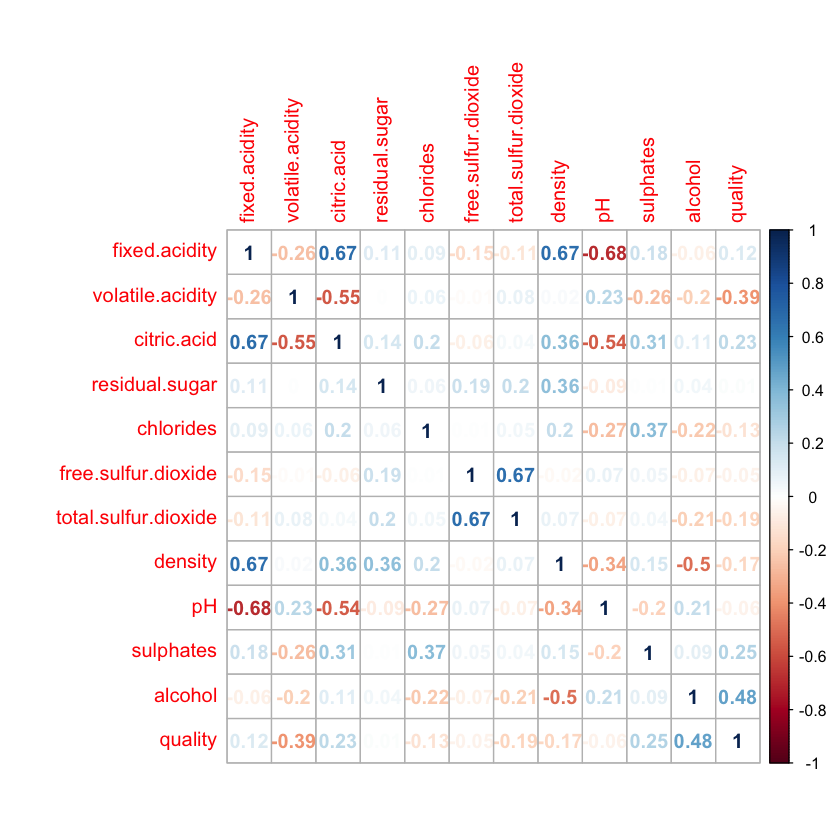

In [107]:
corrplot(cor(wine[1:(length(wine))]), method="number")

Covariance Matrix

There is some significant multicollineraity between several variables:

density - alcohol
total.sulfur.dioxide - free.sulfur.dioxide
density - residual.sugar
residual.sugar - total.sulfur.dioxide
density - fixed.acidity

Certain predictors will have to be removed. Most likely candidates are:

free.sulfur.dioxide
residual.sugar
fixed.acidity
alcohol


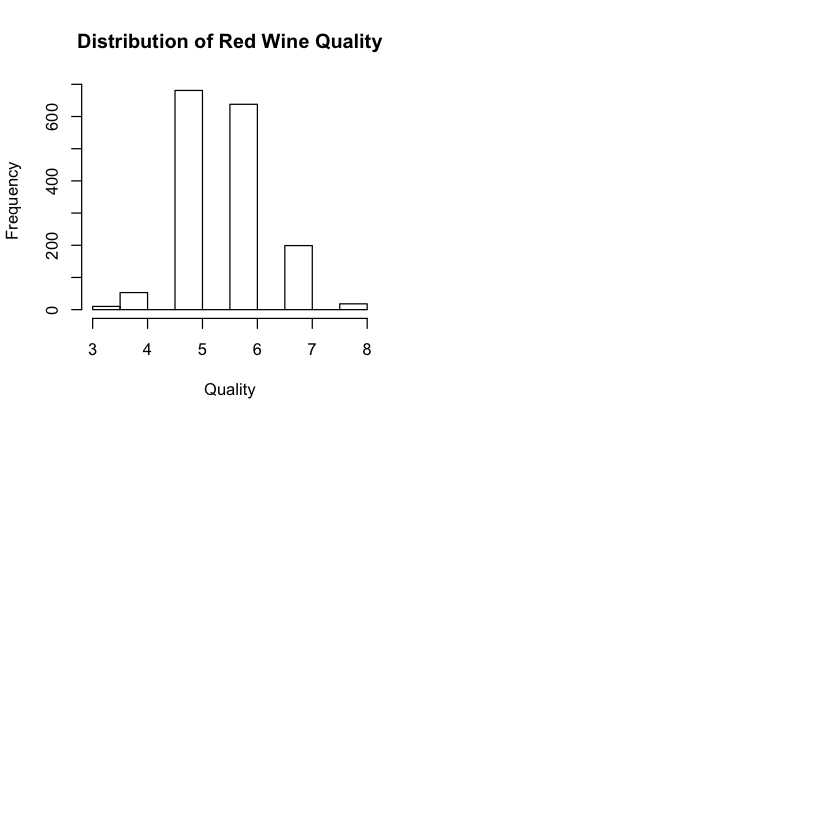

In [108]:
par(mfrow = c(2,2))

hist(wine$quality,xlab = 'Quality', main = "Distribution of Red Wine Quality")
#hist(wine[wine$type == "white",]$quality,xlab = 'Quality', main = "Distribution of White Wine Quality")
#hist(wine[wine$type == "red",]$quality,xlab = 'Quality', main = "Distribution of Red Wine Quality")

The following objects are masked from wine (pos = 3):

    alcohol, chlorides, citric.acid, density, fixed.acidity,
    free.sulfur.dioxide, pH, quality, residual.sugar, sulphates,
    total.sulfur.dioxide, volatile.acidity



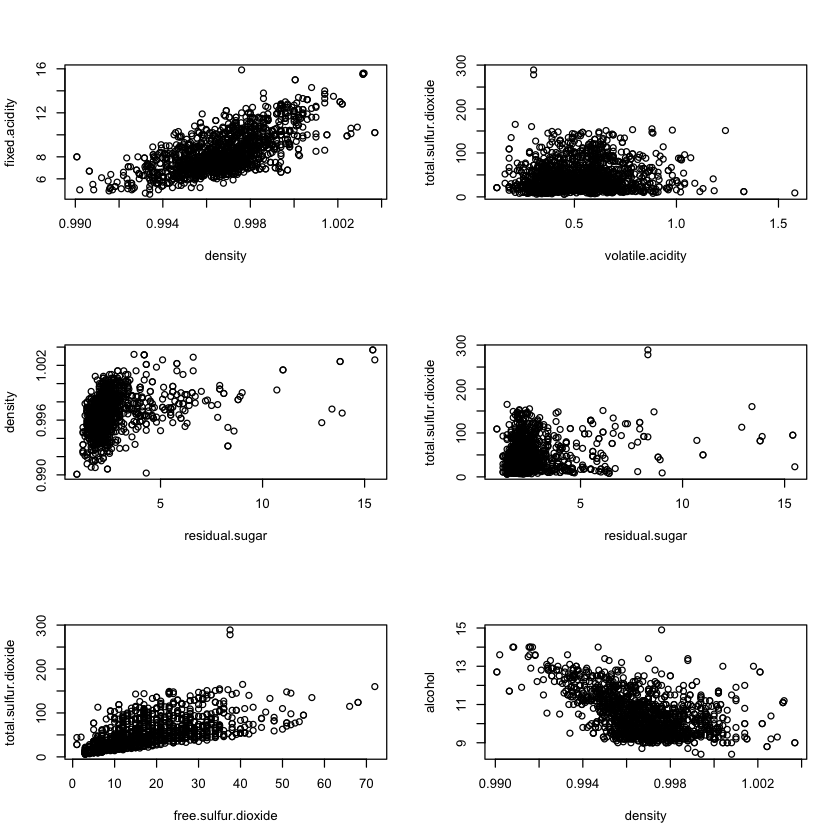

In [109]:
attach(wine)
par(mfrow = c(3,2))

plot(density, fixed.acidity)
plot(volatile.acidity, total.sulfur.dioxide)
plot(residual.sugar, density)
plot(residual.sugar, total.sulfur.dioxide)
plot(free.sulfur.dioxide, total.sulfur.dioxide)
plot(density, alcohol)

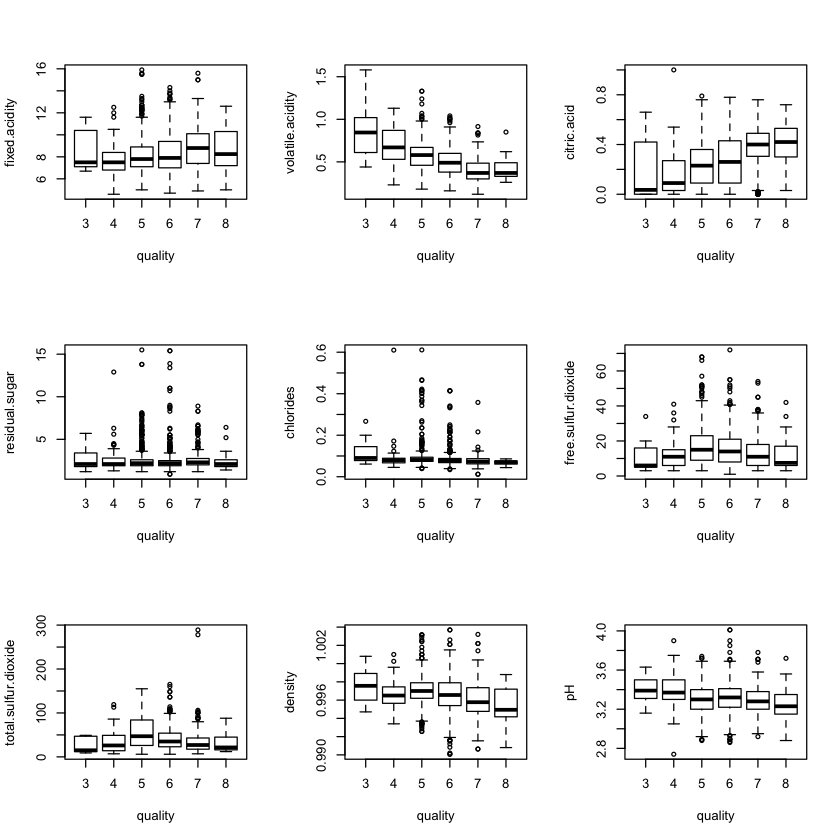

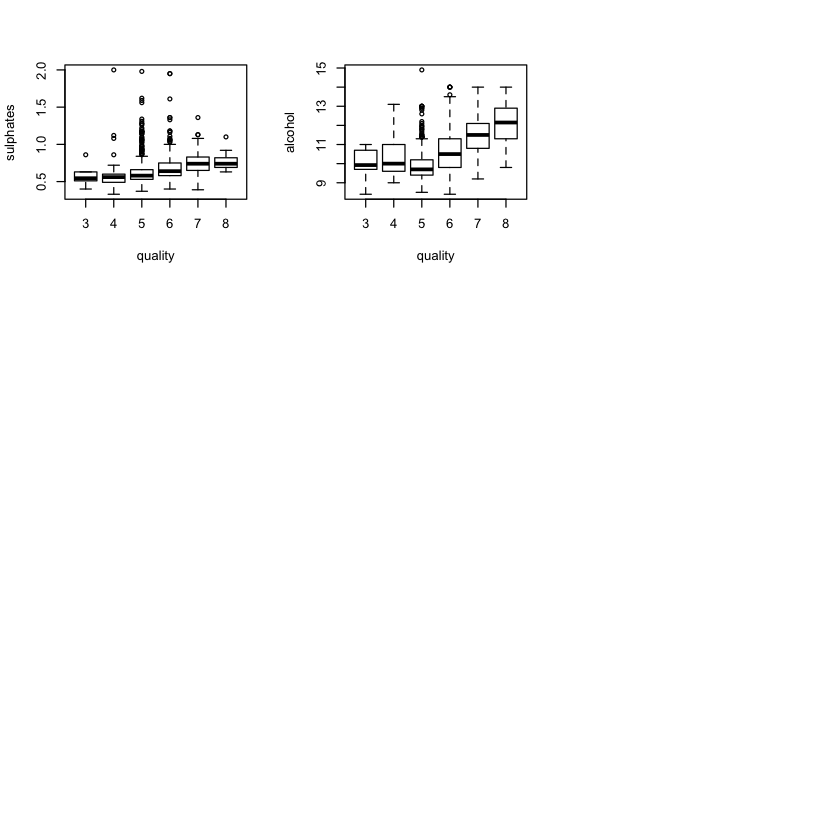

In [110]:
par(mfrow = c(3,3))
boxplot(fixed.acidity ~ quality)
boxplot(volatile.acidity ~ quality)
boxplot(citric.acid ~ quality)
boxplot(residual.sugar ~ quality)
boxplot(chlorides ~ quality)
boxplot(free.sulfur.dioxide ~ quality)
boxplot(total.sulfur.dioxide ~ quality)
boxplot(density ~ quality)
boxplot(pH ~ quality)
boxplot(sulphates ~ quality)
boxplot(alcohol ~ quality)

Data Preparation

In [111]:
#wine <- rbind(white, red)
wine.pr <- wine[1:11]

wine$quality <- ifelse(wine$quality>= 6, 1,0)
wine$quality <- as.factor(wine$quality)
summary(wine)


#Random sampling
set.seed(7406)

test <- 0.8
ff <- floor((1 - test)*nrow(wine))
ind <- sample(nrow(wine), ff, replace = FALSE)

# Training and Test datasets
wine_train <- wine[ind,]
wine_test <- wine[-ind,]


 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

MODELING

We will start with converting scale values for "quality" from 1-10 to a binary system (0,1). A 1 will represent good wine and a 0 will represent "bad" wine.
We will analyze initial dataset using ordinal logistic regression at the end of this research.

At first, we will use logistic regression, KNN, SVM, Trees etc..

For Logistic regression, we romoved the following non-significant predictors:

density
fixed.acidity
residual.sugar

This is well-aligned with the conclusions from the covariance matrix


# Logistic Regression

### Logistic Regression with All Predictors

In [112]:
lgall <- glm(quality ~ ., data = wine, family = binomial(link="logit"))
summary(lgall)


Call:
glm(formula = quality ~ ., family = binomial(link = "logit"), 
    data = wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4025  -0.8387   0.3105   0.8300   2.3142  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           42.949948  79.473979   0.540  0.58890    
fixed.acidity          0.135980   0.098483   1.381  0.16736    
volatile.acidity      -3.281694   0.488214  -6.722 1.79e-11 ***
citric.acid           -1.274347   0.562730  -2.265  0.02354 *  
residual.sugar         0.055326   0.053770   1.029  0.30351    
chlorides             -3.915713   1.569298  -2.495  0.01259 *  
free.sulfur.dioxide    0.022220   0.008236   2.698  0.00698 ** 
total.sulfur.dioxide  -0.016394   0.002882  -5.688 1.29e-08 ***
density              -50.932385  81.148745  -0.628  0.53024    
pH                    -0.380608   0.720203  -0.528  0.59717    
sulphates              2.795107   0.452184   6.181 6.36e-10 ***
alcohol         

In [113]:
wald.test(Sigma = vcov(lgall), b = coef(lgall), Terms = 1:length(lgall$coef))

Wald test:
----------

Chi-squared test:
X2 = 356.5, df = 12, P(> X2) = 0.0

Since p-value = 0.0, then there are no non-significant coefficients.

In [114]:
aiclgall <- round(AIC(lgall),1)
biclgall <- round(BIC(lgall),1)

print(paste('AIC = ', aiclgall, '     BIC = ', biclgall))

[1] "AIC =  1679.6      BIC =  1744.2"


In [115]:
print('Significance Ranking')
round(vif(lgall),3)

[1] "Significance Ranking"


fixed.acidity     volatile.acidity          citric.acid 
               7.969                1.777                3.280 
      residual.sugar            chlorides  free.sulfur.dioxide 
               1.721                1.576                2.015 
total.sulfur.dioxide              density                   pH 
               2.191                5.768                3.439 
           sulphates              alcohol 
               1.482                2.290

In [116]:
# Confidence Intervals

exp(cbind(OR = coef(lgall), confint(lgall)))

Waiting for profiling to be done...


OR           2.5 %        97.5 %      
(Intercept)          4.497027e+18 9.875179e-50 2.611259e+86
fixed.acidity        1.145659e+00 9.453487e-01 1.391245e+00
volatile.acidity     3.756458e-02 1.417753e-02 9.623115e-02
citric.acid          2.796134e-01 9.208797e-02 8.372148e-01
residual.sugar       1.056885e+00 9.505294e-01 1.174768e+00
chlorides            1.992634e-02 8.561776e-04 4.097313e-01
free.sulfur.dioxide  1.022469e+00 1.006133e+00 1.039179e+00
total.sulfur.dioxide 9.837397e-01 9.780924e-01 9.892261e-01
density              7.591825e-23 4.731209e-92 8.931309e+46
pH                   6.834461e-01 1.670776e-01 2.818561e+00
sulphates            1.636437e+01 6.881270e+00 4.054391e+01
alcohol              2.379338e+00 1.943967e+00 2.925369e+00

In [117]:
print('Error')
prediction <- predict(lgall,wine[,1:11], type = "response")
prediction <- ifelse(prediction>= .5, 1,0)

[1] "Error"


In [118]:
cm <- confusionMatrix(wine$quality, as.factor(prediction))
print(cm)

print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 549 195
         1 214 641
                                          
               Accuracy : 0.7442          
                 95% CI : (0.7221, 0.7654)
    No Information Rate : 0.5228          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.4868          
                                          
 Mcnemar's Test P-Value : 0.3734          
                                          
            Sensitivity : 0.7195          
            Specificity : 0.7667          
         Pos Pred Value : 0.7379          
         Neg Pred Value : 0.7497          
             Prevalence : 0.4772          
         Detection Rate : 0.3433          
   Detection Prevalence : 0.4653          
      Balanced Accuracy : 0.7431          
                                          
       'Positive' Class : 0               
                              

### Logistic Regression with Significant Predictors

In [119]:
lgsig <- glm(quality ~ .- residual.sugar - fixed.acidity - density - citric.acid - pH, 
             data = wine, family = binomial(link="logit"))
summary(lgsig)


Call:
glm(formula = quality ~ . - residual.sugar - fixed.acidity - 
    density - citric.acid - pH, family = binomial(link = "logit"), 
    data = wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0827  -0.8539   0.3241   0.8369   2.3080  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -8.149844   0.809006 -10.074  < 2e-16 ***
volatile.acidity     -2.895939   0.370675  -7.813 5.60e-15 ***
chlorides            -4.421027   1.432052  -3.087  0.00202 ** 
free.sulfur.dioxide   0.023862   0.007987   2.988  0.00281 ** 
total.sulfur.dioxide -0.017505   0.002707  -6.468 9.95e-11 ***
sulphates             2.705876   0.427543   6.329 2.47e-10 ***
alcohol               0.859379   0.070725  12.151  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2209.0  on 1598  degrees of freedom
Residual deviance: 1664.7  on 15

In [120]:
wald.test(Sigma = vcov(lgsig), b = coef(lgsig), Terms = 1:length(lgsig$coef))

Wald test:
----------

Chi-squared test:
X2 = 353.6, df = 7, P(> X2) = 0.0

In [121]:
aiclgsig <- round(AIC(lgsig),1)
biclgsig <- round(BIC(lgsig),1)

print(paste('AIC = ', aiclgsig, '     BIC = ', biclgsig))

[1] "AIC =  1678.7      BIC =  1716.4"


In [122]:
print('Significance Ranking')
round(vif(lgsig),3)

[1] "Significance Ranking"


volatile.acidity            chlorides  free.sulfur.dioxide 
               1.046                1.347                1.876 
total.sulfur.dioxide            sulphates              alcohol 
               1.912                1.359                1.061

In [123]:
exp(cbind(OR = coef(lgsig), confint(lgsig)))

Waiting for profiling to be done...


OR           2.5 %        97.5 %      
(Intercept)          2.887804e-04 5.790494e-05  0.001382764
volatile.acidity     5.524713e-02 2.647643e-02  0.113314431
chlorides            1.202188e-02 6.719787e-04  0.188811030
free.sulfur.dioxide  1.024149e+00 1.008293e+00  1.040386786
total.sulfur.dioxide 9.826471e-01 9.773245e-01  0.987765461
sulphates            1.496742e+01 6.599082e+00 35.310209138
alcohol              2.361693e+00 2.060864e+00  2.719686654

In [124]:
print('Error')
predictions <- predict(lgsig,wine[,1:11], type = "response")
predictions <- ifelse(predictions >= .5, 1,0)

cm <- confusionMatrix(wine$quality, as.factor(predictions))
print(cm)

print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

[1] "Error"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 559 185
         1 215 640
                                          
               Accuracy : 0.7498          
                 95% CI : (0.7279, 0.7709)
    No Information Rate : 0.5159          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.4986          
                                          
 Mcnemar's Test P-Value : 0.1471          
                                          
            Sensitivity : 0.7222          
            Specificity : 0.7758          
         Pos Pred Value : 0.7513          
         Neg Pred Value : 0.7485          
             Prevalence : 0.4841          
         Detection Rate : 0.3496          
   Detection Prevalence : 0.4653          
      Balanced Accuracy : 0.7490          
                                          
       'Positive' Class : 0               
                  

# KMEANS

Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”

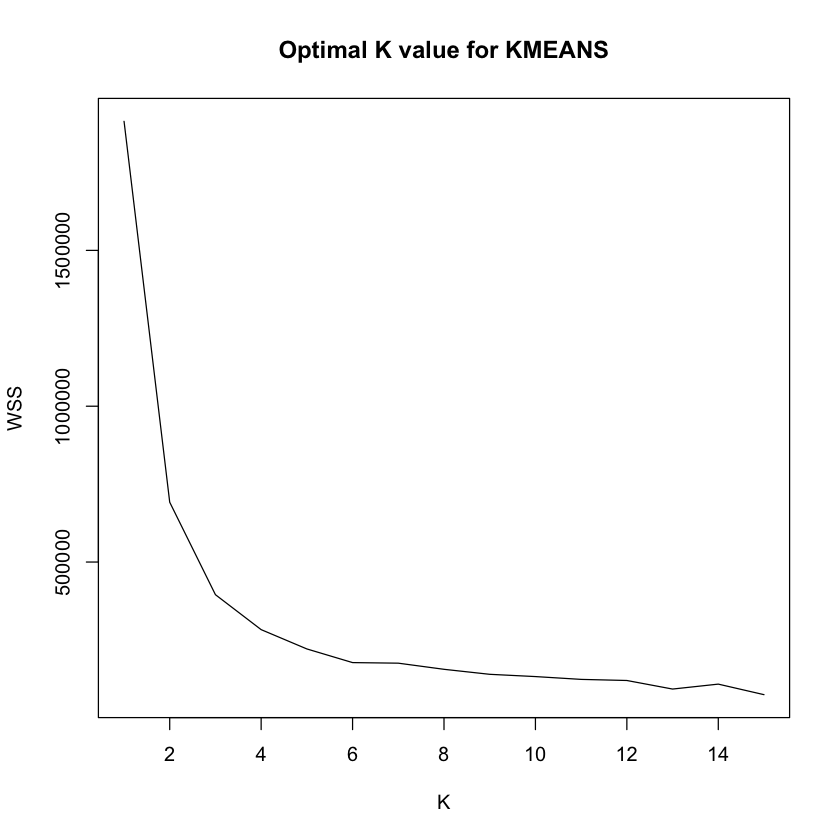

In [125]:
#wine.pr$quality <- as.numeric(wine.pr$quality)

num <- 15
nst <- 6 #Initial number of centroids

res_fin <- matrix(0, num, 1) 

for (k in 1:num) {
  
    kmd <- kmeans(wine.pr, k, nstart = nst)
    kvl <- kmd$tot.withinss
    res_fin[k] <- kvl
}

plot(res_fin, type = 'l', ylab = 'WSS', xlab = 'K',
     main = 'Optimal K value for KMEANS')


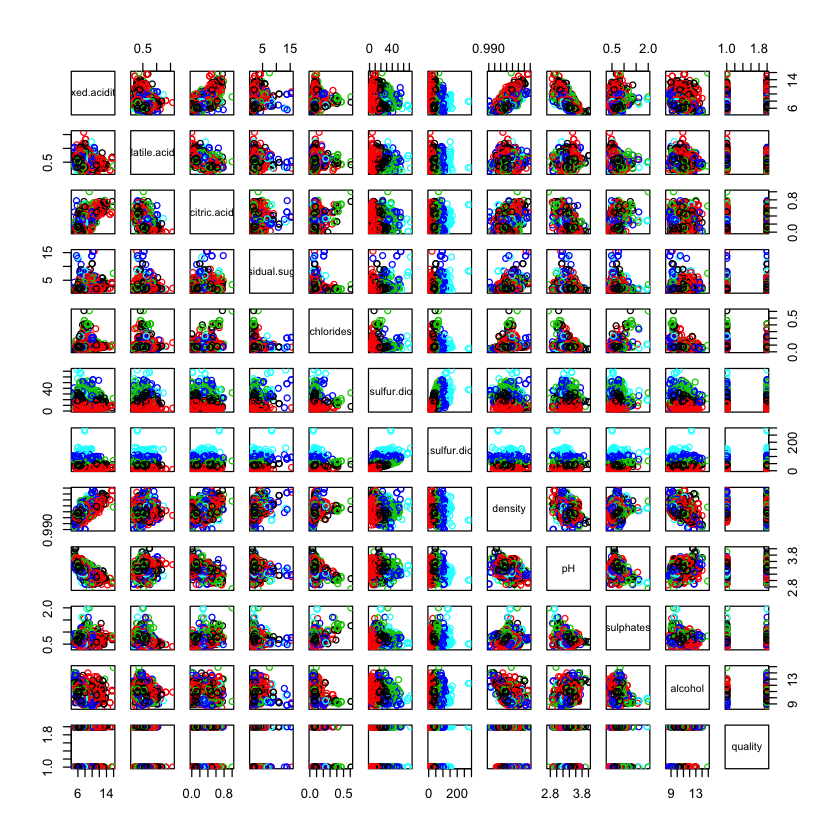

In [126]:
# WSS Method

kbest <- 5 # The best K Value
fitK = kmeans(wine.pr, kbest, nstart = 5)
plot(wine,col = fitK$cluster)



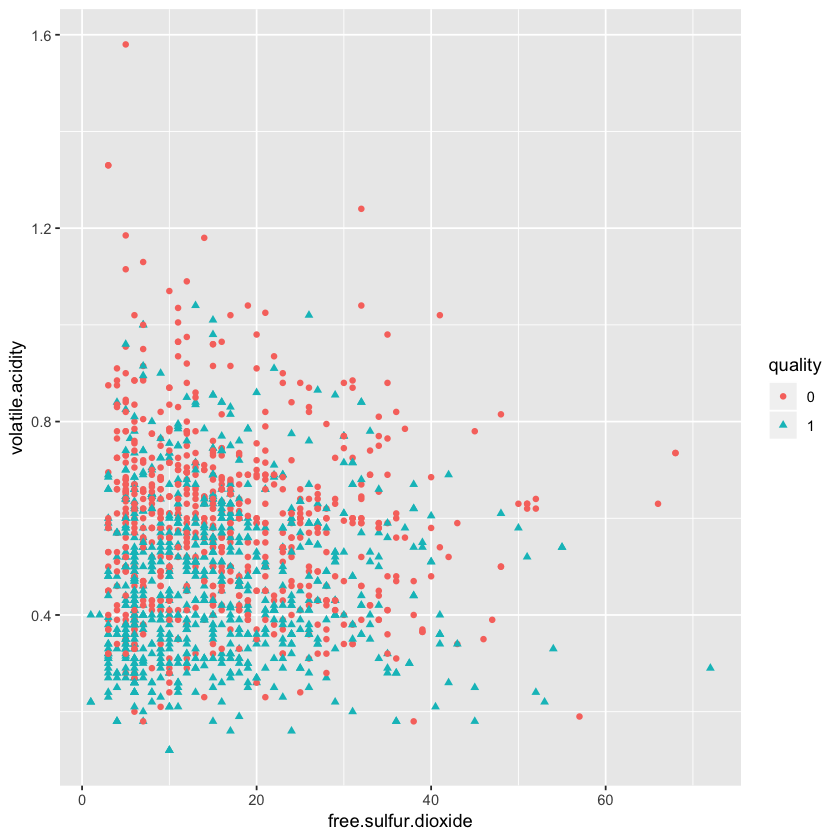

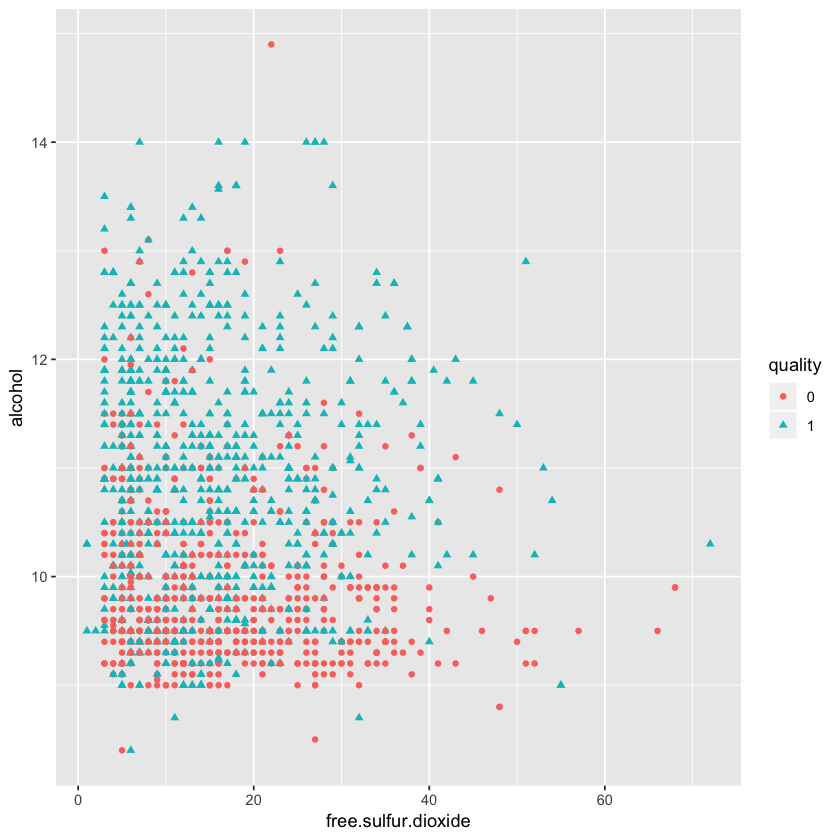

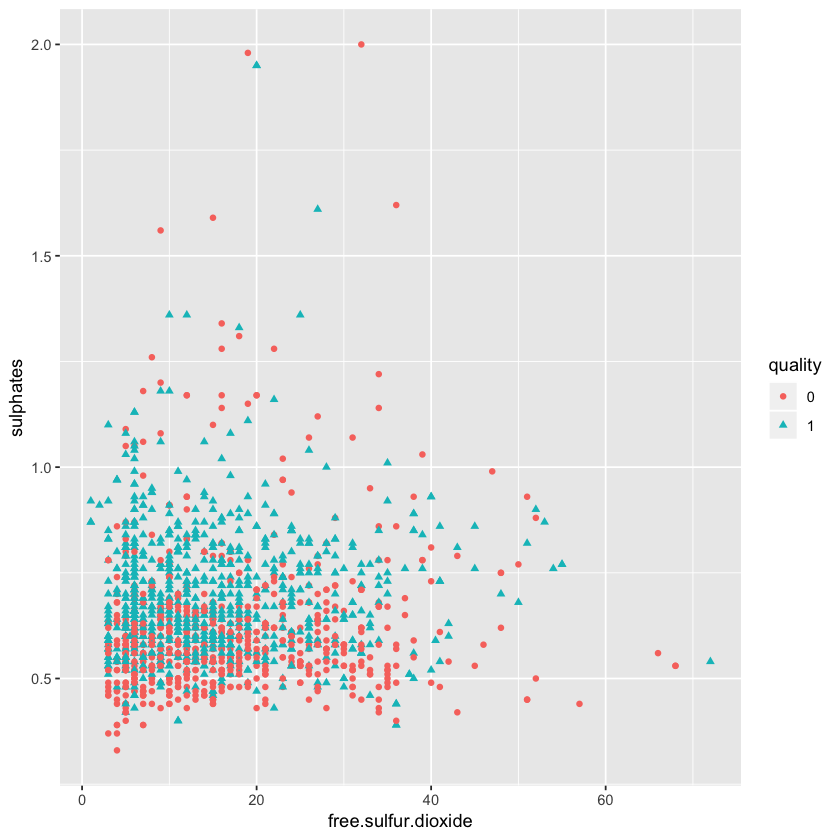

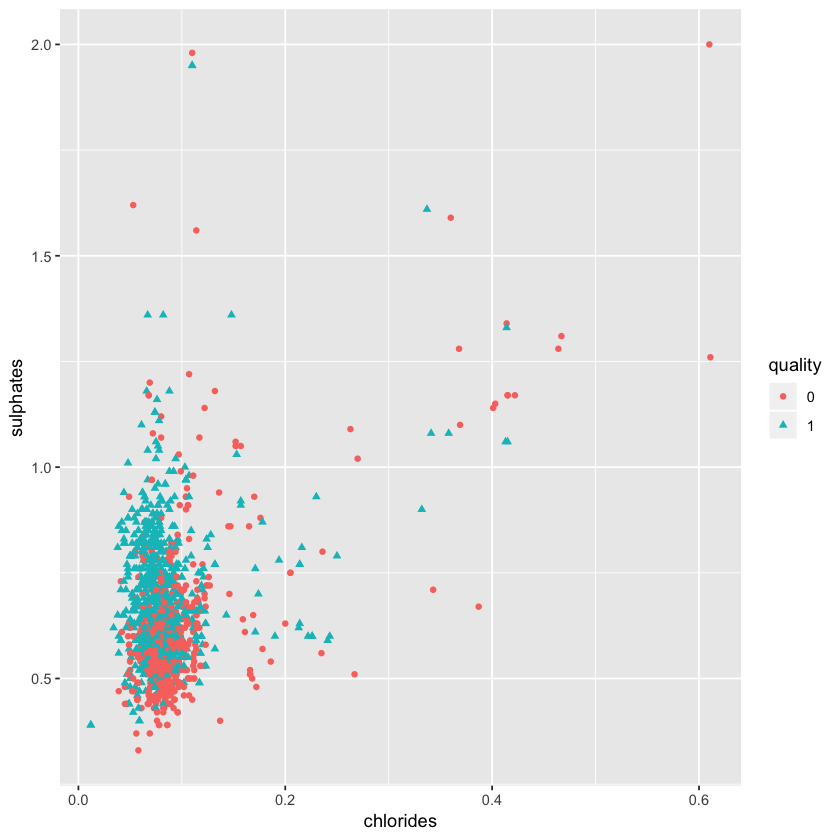

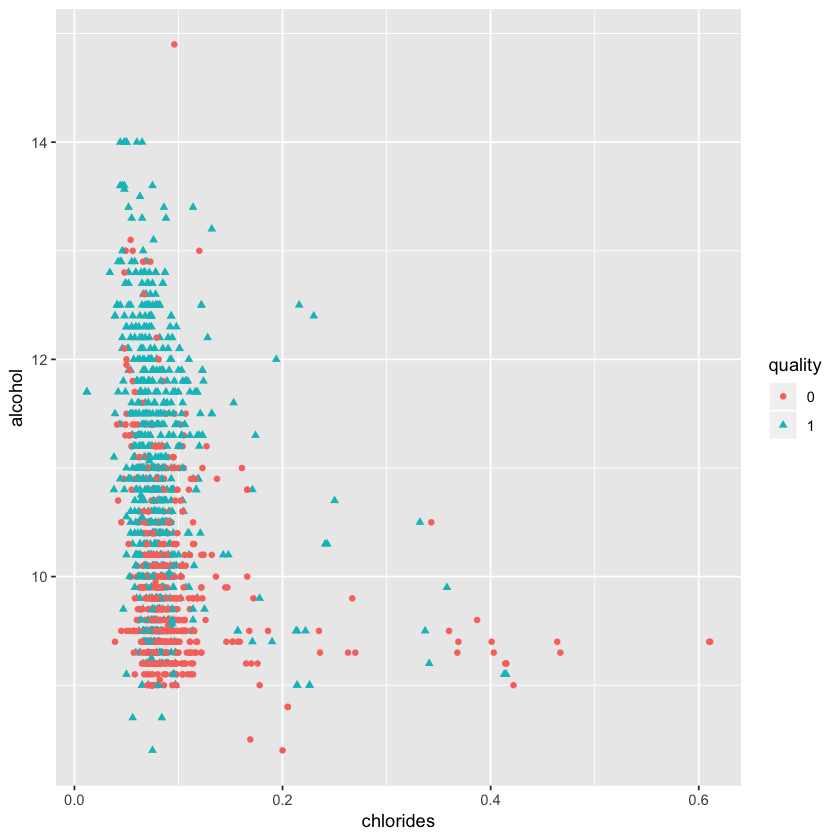

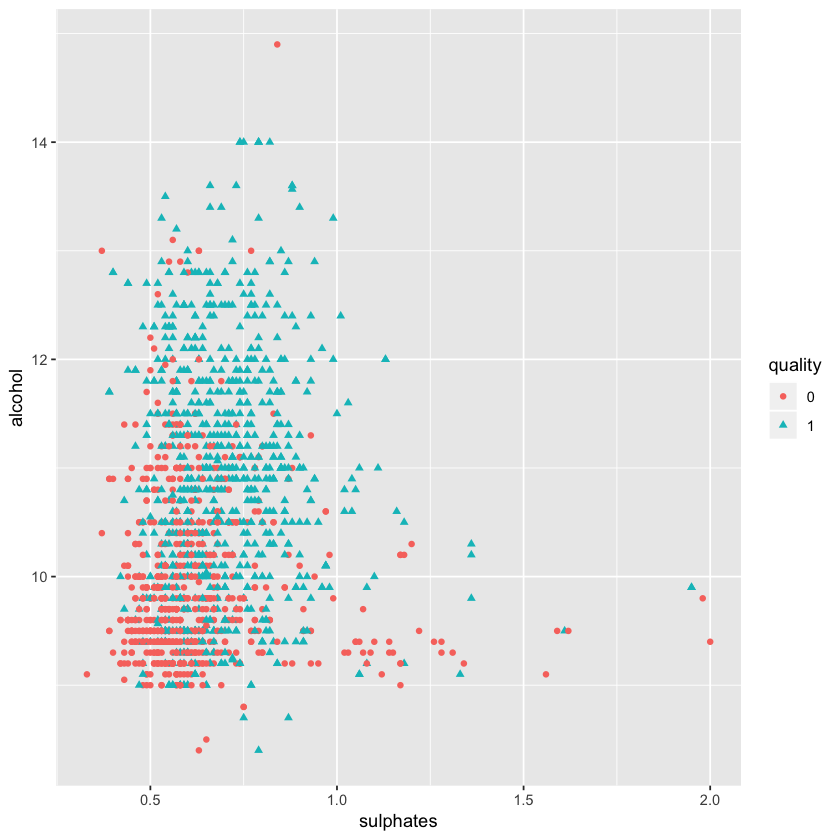

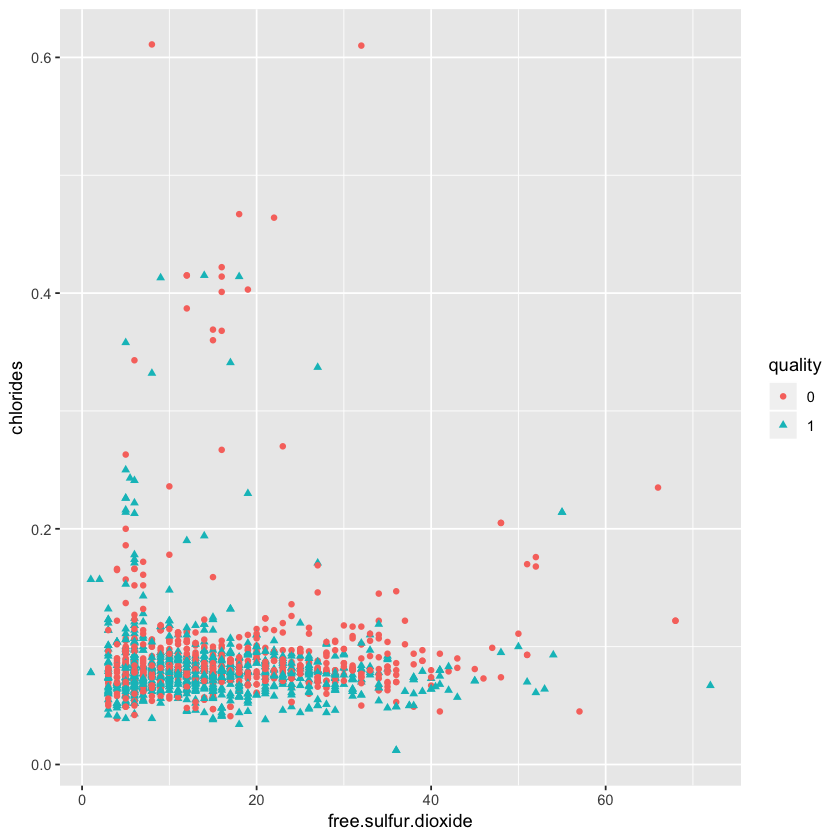

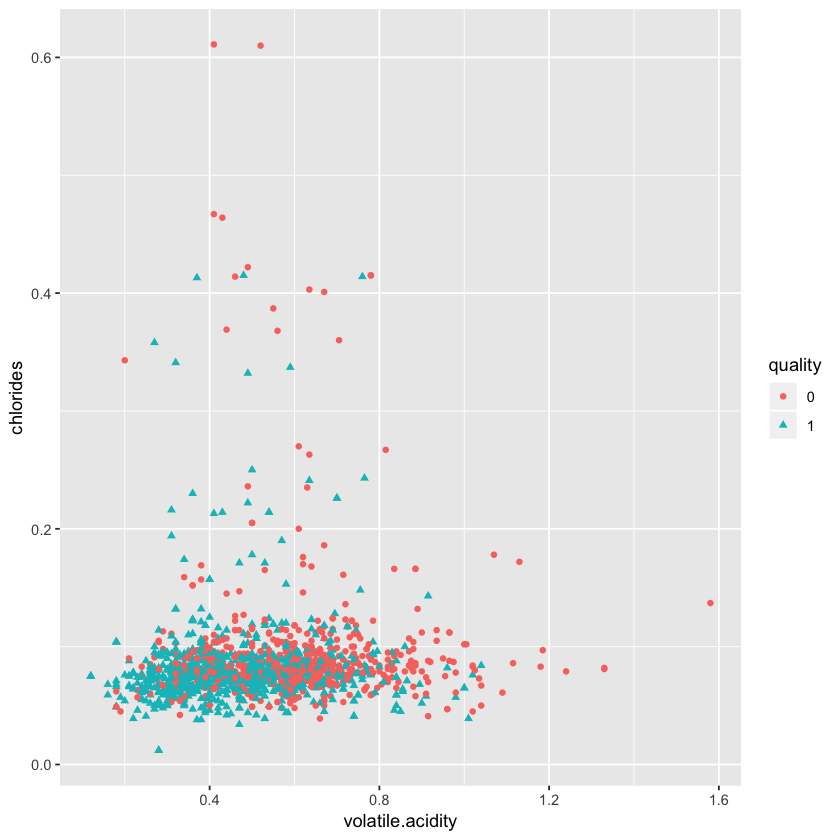

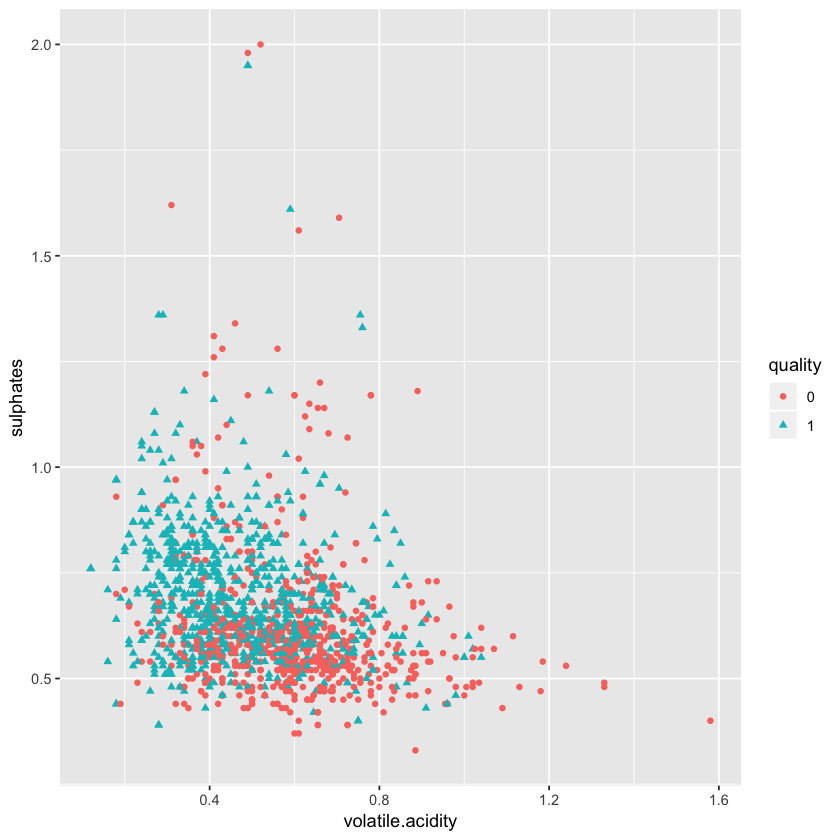

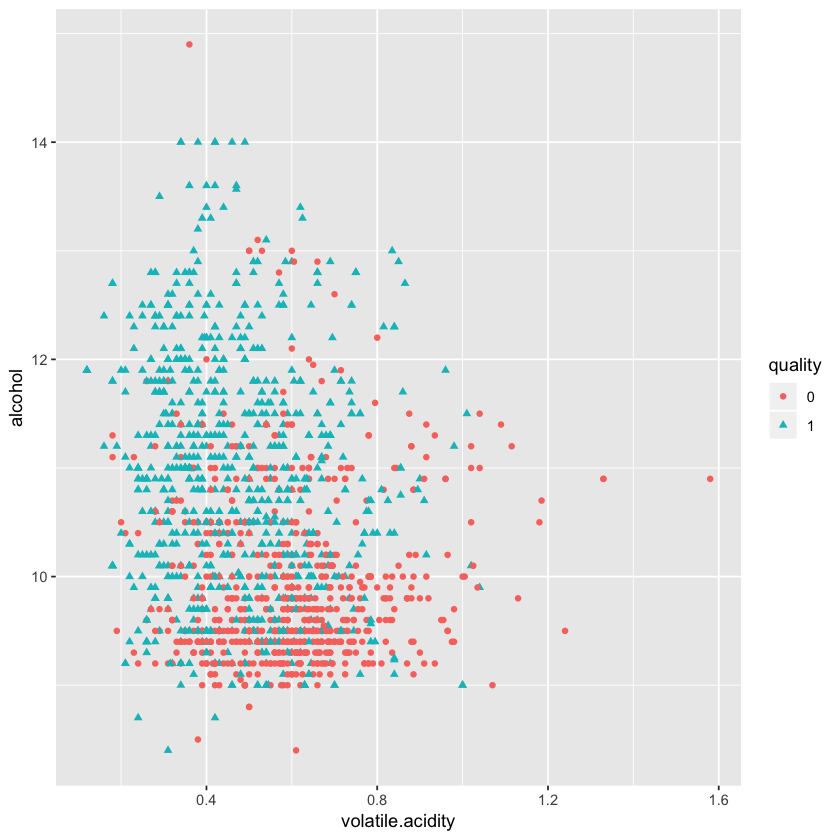

In [127]:
ggplot(wine, aes(x = free.sulfur.dioxide, y = volatile.acidity, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = free.sulfur.dioxide, y = alcohol, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = free.sulfur.dioxide, y = sulphates, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = chlorides, y = sulphates, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = chlorides, y = alcohol, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = sulphates, y = alcohol, shape = quality, col = quality)) + geom_point()

ggplot(wine, aes(x = free.sulfur.dioxide, y = chlorides, shape = quality, 
                 col = quality))+geom_point()

ggplot(wine, aes(x = volatile.acidity, y = chlorides, shape = quality, col = quality))+geom_point()

ggplot(wine, aes(x = volatile.acidity, y = sulphates, shape = quality, col = quality))+geom_point()
ggplot(wine, aes(x = volatile.acidity, y = alcohol, shape = quality, col = quality))+geom_point()


# The data is not separable. Thus KNN is preferred choice over SVM


In [128]:
fitK

K-means clustering with 5 clusters of sizes 446, 598, 292, 193, 70

Cluster means:
  fixed.acidity volatile.acidity citric.acid residual.sugar  chlorides
1      8.232960        0.5264126   0.2422197       2.397085 0.08646861
2      8.621070        0.5129599   0.2875753       2.425251 0.08402174
3      8.229795        0.5203767   0.2750685       2.405993 0.09495205
4      7.817098        0.5772021   0.2607254       3.090155 0.08837824
5      8.057143        0.5586429   0.3235714       3.445714 0.08951429
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1           15.422646             38.91704 0.9966850 3.328924 0.6471749
2            7.478261             18.48997 0.9966374 3.299682 0.6537960
3           25.020548             61.59932 0.9968999 3.324247 0.6857534
4           23.227979             94.23316 0.9968525 3.313316 0.6392228
5           32.064286            138.77143 0.9971420 3.234429 0.7022857
    alcohol
1 10.444283
2 10.642252
3 10.299600
4 10.110104

In [129]:
library(factoextra)
fviz_cluster(fitK, data = wine.pr)

ERROR: Error in library(factoextra): there is no package called ‘factoextra’


# KNN

1 = 71.09375 
2 = 66.875 
3 = 68.04688 
4 = 66.95312 
5 = 67.42188 
6 = 65.78125 
7 = 65.54688 
8 = 66.01562 
9 = 67.26562 
10 = 66.09375 
11 = 66.32812 
12 = 65.78125 
13 = 65.9375 
14 = 66.5625 
15 = 65.46875 
16 = 65.9375 
17 = 65.07812 
18 = 65.3125 
19 = 64.84375 
20 = 64.92188 
21 = 63.90625 
22 = 63.82812 
23 = 63.28125 
24 = 63.67188 
25 = 63.04688 
26 = 62.5 
27 = 62.42188 
28 = 62.65625 


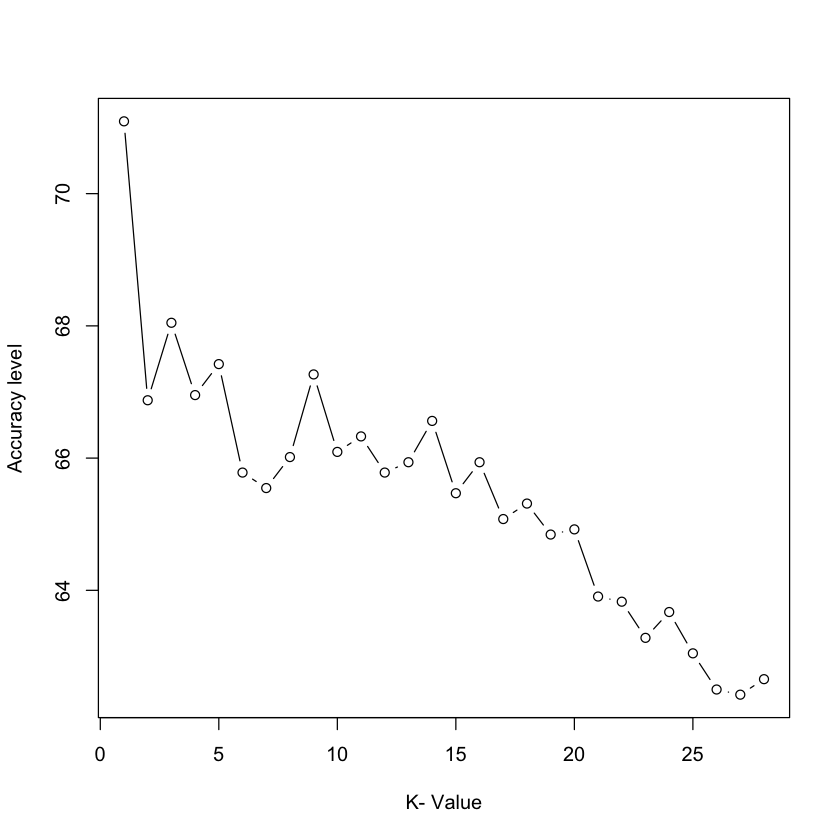

In [130]:
i=1
k.optm=1

for (i in 1:28){
    knn.mod <- knn(train=wine_train, test=wine_test, cl=wine_train$quality, k=i)
    
    k.optm[i] <- 100 * sum(wine_test$quality == knn.mod)/NROW(wine_test$quality)
    
    k=i
    
    cat(k,'=',k.optm[i],'
')}

plot(k.optm, type="b", xlab="K- Value",ylab="Accuracy level")

In [131]:
kbest <- 3

knn <- knn(train=wine_train, test=wine_test, cl=wine_train$quality, k= kbest)

In [132]:
cm <- confusionMatrix(wine_test$quality, as.factor(knn))
print(cm)

print(paste('Accuracy = ', round(cm$overall['Accuracy'],3) ))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 374 236
         1 175 495
                                          
               Accuracy : 0.6789          
                 95% CI : (0.6525, 0.7044)
    No Information Rate : 0.5711          
    P-Value [Acc > NIR] : 1.643e-15       
                                          
                  Kappa : 0.3535          
                                          
 Mcnemar's Test P-Value : 0.003081        
                                          
            Sensitivity : 0.6812          
            Specificity : 0.6772          
         Pos Pred Value : 0.6131          
         Neg Pred Value : 0.7388          
             Prevalence : 0.4289          
         Detection Rate : 0.2922          
   Detection Prevalence : 0.4766          
      Balanced Accuracy : 0.6792          
                                          
       'Positive' Class : 0               
                              

# SVM


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "linear", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.09090909 

Number of Support Vectors:  174


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "linear", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  2 
      gamma:  0.09090909 

Number of Support Vectors:  174


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "linear", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  3 
      gamma:  0.09090909 

Number of Support Vectors:  175


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "linear", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 

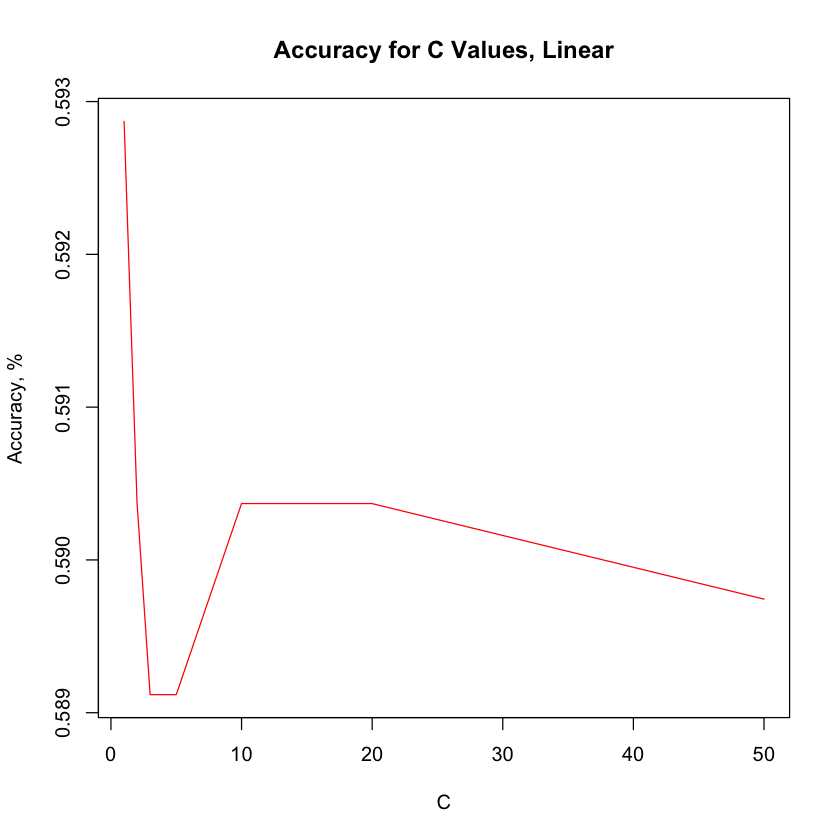

In [133]:
# Linear Classifier

# To get graphical outputs
results_c <- matrix(rep(0, len=14), nrow = 2)

c_value = c(1, 2, 3, 5, 10, 20, 50) # chosen C values to select from
cl = length(c_value) 

for (j in 1:cl) {
  
  cj <- c_value[j]
  results_c[1,j] <- cj
    
  msvm <- svm(formula = quality ~ .,
                data = wine_train,
                type = 'C-classification',
                kernel = 'linear',
                cost = cj,
                scaled = TRUE)
    
  print(msvm) # display the model

  # Model Prediction and Accuracy
  pred <- predict(msvm,wine_test[,1:11])
  acc = sum(pred == wine_test$quality) / nobs
  results_c[2,j] <- acc
    
}

plot(results_c[1,], results_c[2,],main="Accuracy for C Values, Linear",
     ylab = "Accuracy, %", xlab = "C", type = "l", col = "red")

c_best <- which.max(results_c[2,])
print(paste(' Best C = ', c_best, '   Accuracy = ', round(results_c[2,c_best],3)))



Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "radial", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.09090909 

Number of Support Vectors:  219


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "radial", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  2 
      gamma:  0.09090909 

Number of Support Vectors:  211


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "radial", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  3 
      gamma:  0.09090909 

Number of Support Vectors:  209


Call:
svm(formula = quality ~ ., data = wine_train, type = "C-classification", 
    kernel = "radial", cost = cj, scaled = TRUE)


Parameters:
   SVM-Type:  C-classification 

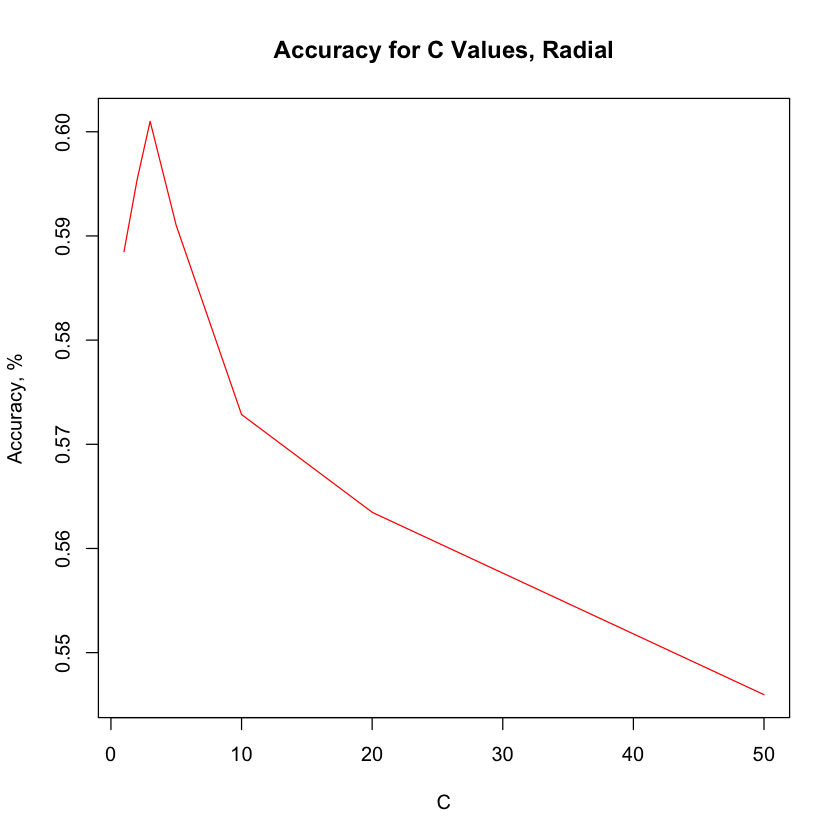

In [134]:
# To get graphical outputs
results_c <- matrix(rep(0, len=14), nrow = 2)

c_value = c(1, 2, 3, 5, 10, 20, 50) # chosen C values to select from
cl = length(c_value) 

for (j in 1:cl) {
  
  cj <- c_value[j]
  results_c[1,j] <- cj
    
  msvm <- svm(formula = quality ~ .,
                data = wine_train,
                type = 'C-classification',
                kernel = 'radial',
                cost = cj,
                scaled = TRUE)
    
  print(msvm) # display the model

  # Model Prediction and Accuracy
  pred <- predict(msvm,wine_test[,1:11])
  prediction = sum(pred == wine_test$quality) / nobs
  results_c[2,j] <- prediction
    
}

plot(results_c[1,], results_c[2,],main="Accuracy for C Values, Radial",
     ylab = "Accuracy, %", xlab = "C", type = "l", col = "red")

c_best <- which.max(results_c[2,])
print(paste(' Best C = ', c_best, '   Accuracy = ', round(results_c[2,c_best],3)))


# Ordinal Regression

In [135]:
ord_mod <- polr(as.factor(quality) ~., data = wine.pr, Hess = TRUE)
summary(ord_mod)


Call:
polr(formula = as.factor(quality) ~ ., data = wine.pr, Hess = TRUE)

Coefficients:
                         Value Std. Error t value
fixed.acidity          0.10240   0.051209   2.000
volatile.acidity      -3.41794   0.400103  -8.543
citric.acid           -0.80494   0.462371  -1.741
residual.sugar         0.07617   0.038210   1.993
chlorides             -5.17121   1.354373  -3.818
free.sulfur.dioxide    0.01392   0.006767   2.057
total.sulfur.dioxide  -0.01119   0.002360  -4.744
density              -48.92546   0.974488 -50.206
pH                    -0.98472   0.496900  -1.982
sulphates              2.86724   0.358016   8.009
alcohol                0.85611   0.059355  14.424

Intercepts:
    Value    Std. Error t value 
3|4 -48.8787   0.9979   -48.9797
4|5 -46.9597   0.9959   -47.1541
5|6 -43.2452   0.9988   -43.2968
6|7 -40.3898   1.0111   -39.9454
7|8 -37.3837   1.0409   -35.9138

Residual Deviance: 3074.928 
AIC: 3106.928 

In [136]:
(ctable <- coef(summary(ord_mod)))

Value        Std. Error  t value   
fixed.acidity          0.10239667 0.051208703   1.999595
volatile.acidity      -3.41794232 0.400103057  -8.542655
citric.acid           -0.80493954 0.462371339  -1.740894
residual.sugar         0.07616957 0.038209940   1.993449
chlorides             -5.17121245 1.354373478  -3.818158
free.sulfur.dioxide    0.01392022 0.006767187   2.057016
total.sulfur.dioxide  -0.01119452 0.002359517  -4.744413
density              -48.92545743 0.974488188 -50.206311
pH                    -0.98471618 0.496900166  -1.981718
sulphates              2.86723651 0.358015972   8.008683
alcohol                0.85611493 0.059354809  14.423683
3|4                  -48.87868292 0.997938359 -48.979661
4|5                  -46.95972294 0.995878057 -47.154089
5|6                  -43.24521407 0.998809085 -43.296777
6|7                  -40.38977373 1.011124776 -39.945390
7|8                  -37.38369205 1.040928295 -35.913801

In [137]:
## calculate and store p values
p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2

## combined table
(ctable <- cbind(ctable, "p value" = p))

Value        Std. Error  t value    p value      
fixed.acidity          0.10239667 0.051208703   1.999595  4.554400e-02
volatile.acidity      -3.41794232 0.400103057  -8.542655  1.311728e-17
citric.acid           -0.80493954 0.462371339  -1.740894  8.170214e-02
residual.sugar         0.07616957 0.038209940   1.993449  4.621229e-02
chlorides             -5.17121245 1.354373478  -3.818158  1.344516e-04
free.sulfur.dioxide    0.01392022 0.006767187   2.057016  3.968465e-02
total.sulfur.dioxide  -0.01119452 0.002359517  -4.744413  2.091120e-06
density              -48.92545743 0.974488188 -50.206311  0.000000e+00
pH                    -0.98471618 0.496900166  -1.981718  4.751077e-02
sulphates              2.86723651 0.358015972   8.008683  1.159431e-15
alcohol                0.85611493 0.059354809  14.423683  3.672145e-47
3|4                  -48.87868292 0.997938359 -48.979661  0.000000e+00
4|5                  -46.95972294 0.995878057 -47.154089  0.000000e+00
5|6                  -43.24521407 0.998809085 -43.296777  0.000000e+00
6|7                  -40.38977373 1.011124776 -39.945390  0.000000e+00
7|8                  -37.38369205 1.040928295 -35.913801 1.860313e-282

In [138]:
#(ci <- confint(ord_mod)) # default method gives profiled CIs

In [139]:
confint.default(ord_mod) # CIs assuming normality

# If the move from 2.5% to 97.% includes a zero (a sign change) then this coefficient is NOT statistically significant

2.5 %         97.5 %       
fixed.acidity         2.029459e-03   0.202763888
volatile.acidity     -4.202130e+00  -2.633754738
citric.acid          -1.711171e+00   0.101291629
residual.sugar        1.279467e-03   0.151059678
chlorides            -7.825736e+00  -2.516689216
free.sulfur.dioxide   6.567716e-04   0.027183659
total.sulfur.dioxide -1.581909e-02  -0.006569955
density              -5.083542e+01 -47.015495682
pH                   -1.958623e+00  -0.010809751
sulphates             2.165538e+00   3.568934919
alcohol               7.397816e-01   0.972448215

In [140]:
## odds ratios - These coefficients are called proportional odds ratios
#exp(cbind(OR = coef(ord_mod), ci))

In [141]:
# Let's rerun the regression with only significant predictors

ord_mods <- polr(as.factor(quality) ~. - residual.sugar - fixed.acidity - density - citric.acid - pH, 
                 data = wine.pr, Hess = TRUE)
summary(ord_mods)


Call:
polr(formula = as.factor(quality) ~ . - residual.sugar - fixed.acidity - 
    density - citric.acid - pH, data = wine.pr, Hess = TRUE)

Coefficients:
                        Value Std. Error t value
volatile.acidity     -3.37758   0.321717 -10.499
chlorides            -4.83975   1.254663  -3.857
free.sulfur.dioxide   0.01323   0.006547   2.020
total.sulfur.dioxide -0.01121   0.002244  -4.995
sulphates             2.82640   0.351570   8.039
alcohol               0.84021   0.056315  14.920

Intercepts:
    Value    Std. Error t value 
3|4   2.1890   0.7326     2.9879
4|5   4.1037   0.6710     6.1155
5|6   7.8113   0.6687    11.6815
6|7  10.6328   0.7052    15.0780
7|8  13.6276   0.7596    17.9400

Residual Deviance: 3093.405 
AIC: 3115.405 

In [142]:
(ctable1 <- coef(summary(ord_mods)))

Value       Std. Error  t value   
volatile.acidity     -3.37757880 0.321717050 -10.498601
chlorides            -4.83975357 1.254662678  -3.857414
free.sulfur.dioxide   0.01322711 0.006546880   2.020369
total.sulfur.dioxide -0.01120806 0.002244033  -4.994603
sulphates             2.82640284 0.351569894   8.039377
alcohol               0.84021340 0.056314704  14.919965
3|4                   2.18899507 0.732615103   2.987920
4|5                   4.10370205 0.671028839   6.115538
5|6                   7.81126965 0.668686436  11.681514
6|7                  10.63279309 0.705185658  15.078005
7|8                  13.62760849 0.759622299  17.939980

In [143]:
## calculate and store p values
p <- pnorm(abs(ctable1[, "t value"]), lower.tail = FALSE) * 2

## combined table
(ctable1 <- cbind(ctable1, "p value" = p))

Value       Std. Error  t value    p value     
volatile.acidity     -3.37757880 0.321717050 -10.498601 8.767017e-26
chlorides            -4.83975357 1.254662678  -3.857414 1.145929e-04
free.sulfur.dioxide   0.01322711 0.006546880   2.020369 4.334511e-02
total.sulfur.dioxide -0.01120806 0.002244033  -4.994603 5.895690e-07
sulphates             2.82640284 0.351569894   8.039377 9.029653e-16
alcohol               0.84021340 0.056314704  14.919965 2.444024e-50
3|4                   2.18899507 0.732615103   2.987920 2.808834e-03
4|5                   4.10370205 0.671028839   6.115538 9.623203e-10
5|6                   7.81126965 0.668686436  11.681514 1.584487e-31
6|7                  10.63279309 0.705185658  15.078005 2.259940e-51
7|8                  13.62760849 0.759622299  17.939980 5.747631e-72

In [144]:
#(ci1 <- confint(ord_mods)) # default method gives profiled CIs

In [145]:
ci1 <- confint.default(ord_mods) # CIs assuming normality
ci1

# All predictors are significant

2.5 %         97.5 %      
volatile.acidity     -4.0081326322 -2.747024970
chlorides            -7.2988472358 -2.380659914
free.sulfur.dioxide   0.0003954655  0.026058764
total.sulfur.dioxide -0.0156062801 -0.006809831
sulphates             2.1373385142  3.515467175
alcohol               0.7298386114  0.950588196

In [146]:
## odds ratios - These coefficients are called proportional odds ratios
exp(cbind(OR = coef(ord_mods), ci1))

OR           2.5 %       97.5 %     
volatile.acidity      0.034129990 0.018167289  0.06411833
chlorides             0.007909003 0.000676318  0.09248952
free.sulfur.dioxide   1.013314980 1.000395544  1.02640126
total.sulfur.dioxide  0.988854521 0.984514867  0.99321330
sulphates            16.884614873 8.476846573 33.63163612
alcohol               2.316861351 2.074745740  2.58723101

In [147]:
# Proportional Odds

sf <- function(y) {
  c('Y>=0' = qlogis(mean(y >= 0)),
    'Y>=1' = qlogis(mean(y >= 1)),
    'Y>=2' = qlogis(mean(y >= 2)),
    'Y>=3' = qlogis(mean(y >= 3)),
    'Y>=4' = qlogis(mean(y >= 4)),
    'Y>=6' = qlogis(mean(y >= 6)),
    'Y>=7' = qlogis(mean(y >= 7)),
    'Y>=8' = qlogis(mean(y >= 8)),
    'Y>=9' = qlogis(mean(y >= 9)))
}

(s <- with(wine, summary(as.numeric(quality) ~ fixed.acidity + volatile.acidity + residual.sugar + 
                           free.sulfur.dioxide + density + pH + sulphates + alcohol, fun=sf)))

as.numeric(quality)     N= 1599 

+-------------------+-------------+----+----+----+------------+----+----+----+----+----+----+
|                   |             |N   |Y>=0|Y>=1|Y>=2        |Y>=3|Y>=4|Y>=6|Y>=7|Y>=8|Y>=9|
+-------------------+-------------+----+----+----+------------+----+----+----+----+----+----+
|fixed.acidity      |[4.6, 7.2)   | 419|Inf |Inf | 0.109895671|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
|                   |[7.2, 8.0)   | 397|Inf |Inf |-0.136230450|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
|                   |[8.0, 9.3)   | 387|Inf |Inf | 0.036179657|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
|                   |[9.3,15.9]   | 396|Inf |Inf | 0.559615788|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
+-------------------+-------------+----+----+----+------------+----+----+----+----+----+----+
|volatile.acidity   |[0.120,0.395)| 406|Inf |Inf | 1.158630298|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
|                   |[0.395,0.530)| 410|Inf |Inf | 0.304776506|-Inf|-Inf|-Inf|-Inf|-Inf|-Inf|
|                   |[0.53

In [148]:
# Example

glm(I(as.numeric(quality) >= 4) ~ alcohol, family ="binomial", data = wine)

Warning message:
“glm.fit: algorithm did not converge”


Call:  glm(formula = I(as.numeric(quality) >= 4) ~ alcohol, family = "binomial", 
    data = wine)

Coefficients:
(Intercept)      alcohol  
 -2.657e+01   -3.165e-15  

Degrees of Freedom: 1598 Total (i.e. Null);  1597 Residual
Null Deviance:	    0 
Residual Deviance: 9.277e-09 	AIC: 4

In [149]:
#s[, 4] <- s[, 4] - s[, 3]
#s[, 3] <- s[, 3] - s[, 3]
#s

In [150]:
glm(I(as.numeric(quality) >= 7) ~ alcohol, family ="binomial", data = wine)

Warning message:
“glm.fit: algorithm did not converge”


Call:  glm(formula = I(as.numeric(quality) >= 7) ~ alcohol, family = "binomial", 
    data = wine)

Coefficients:
(Intercept)      alcohol  
 -2.657e+01   -3.165e-15  

Degrees of Freedom: 1598 Total (i.e. Null);  1597 Residual
Null Deviance:	    0 
Residual Deviance: 9.277e-09 	AIC: 4

# Random Forest


Call:
 randomForest(formula = quality ~ ., data = wine_train, importance = TRUE,      ntree = 501, confusion = TRUE, err.rate = TRUE, parms = list(split = "gini"),      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 501
No. of variables tried at each split: 3

        OOB estimate of  error rate: 23.82%
Confusion matrix:
   0   1 class.error
0 92  42   0.3134328
1 34 151   0.1837838


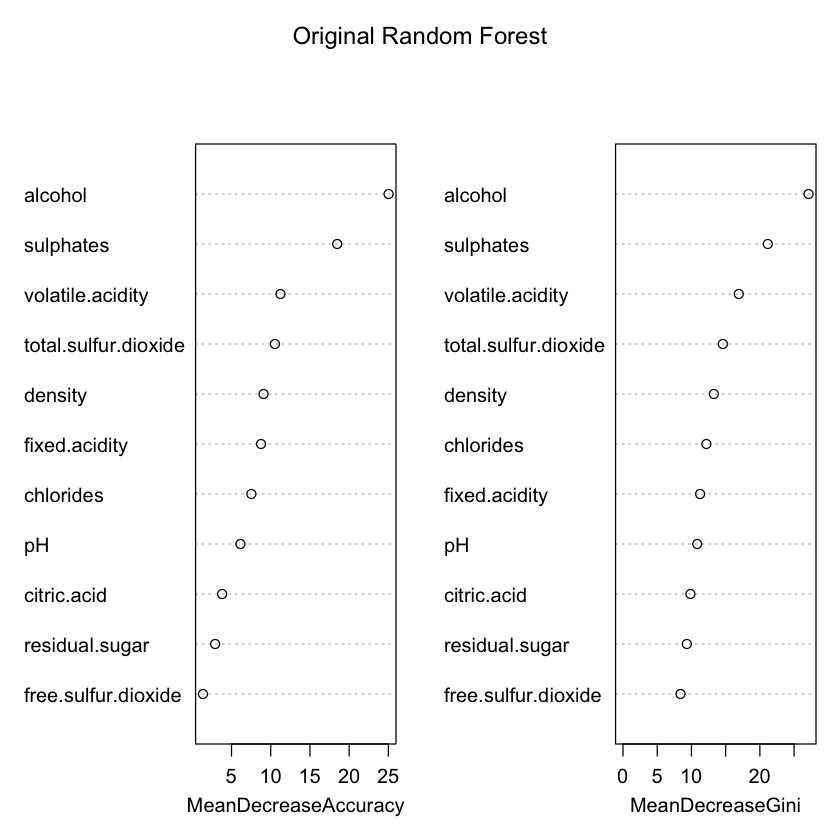

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 134   0
         1   0 185
                                     
               Accuracy : 1          
                 95% CI : (0.9885, 1)
    No Information Rate : 0.5799     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4201     
         Detection Rate : 0.4201     
   Detection Prevalence : 0.4201     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     
[1] "RF Original Train Error =  0"
Confusion Matrix and Statistics

          Reference
Pred

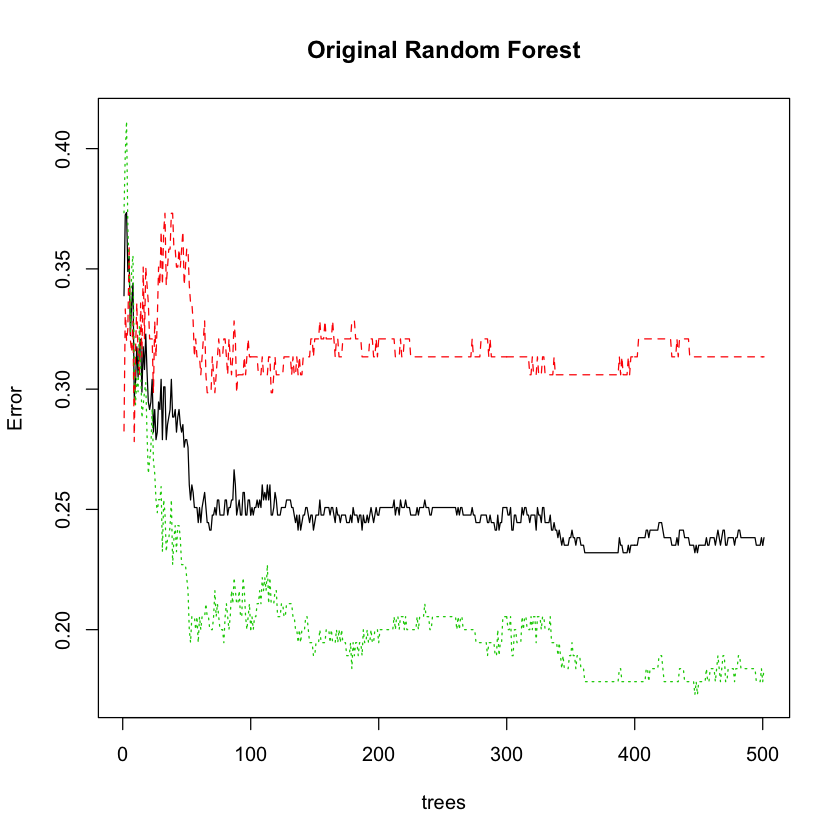

      mtry  OOBError
2.OOB    2 0.2382445
3.OOB    3 0.2507837
4.OOB    4 0.2539185
[1] "Best mtry =  2"

Call:
 randomForest(formula = quality ~ ., data = wine_train, importance = TRUE,      ntree = 1000, mtry = best.m, confusion = TRUE, err.rate = TRUE,      parms = list(split = "gini"), proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 24.45%
Confusion matrix:
   0   1 class.error
0 88  46   0.3432836
1 32 153   0.1729730


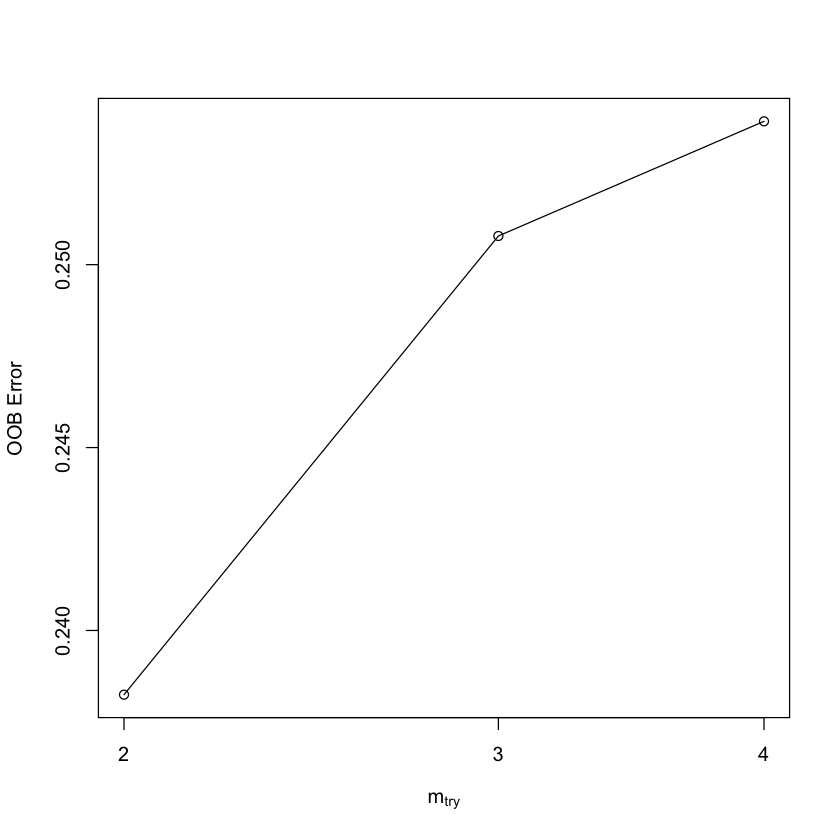

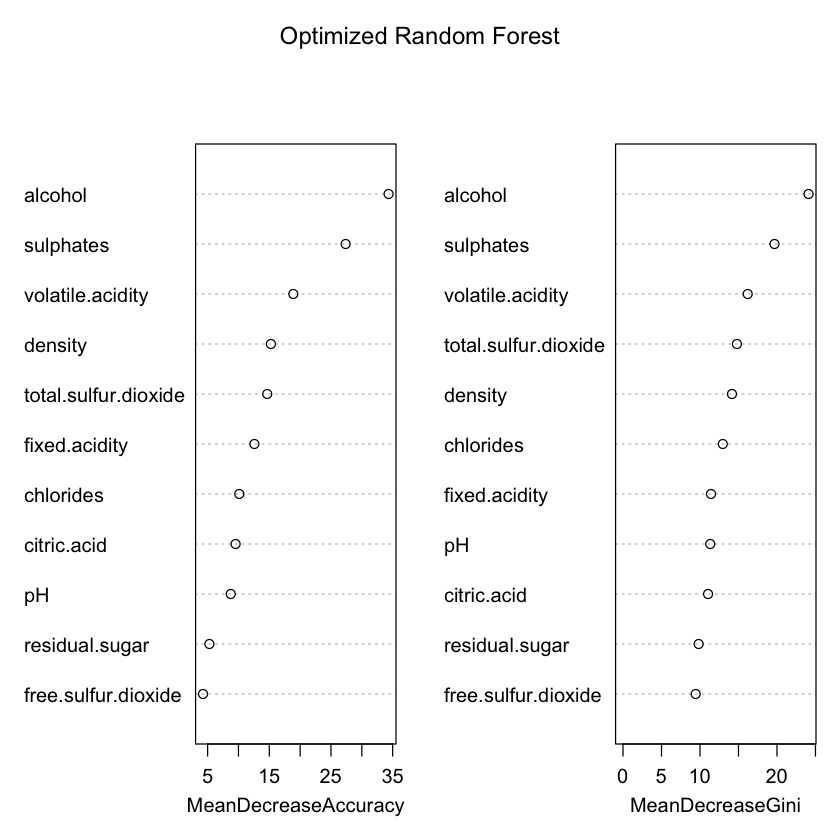

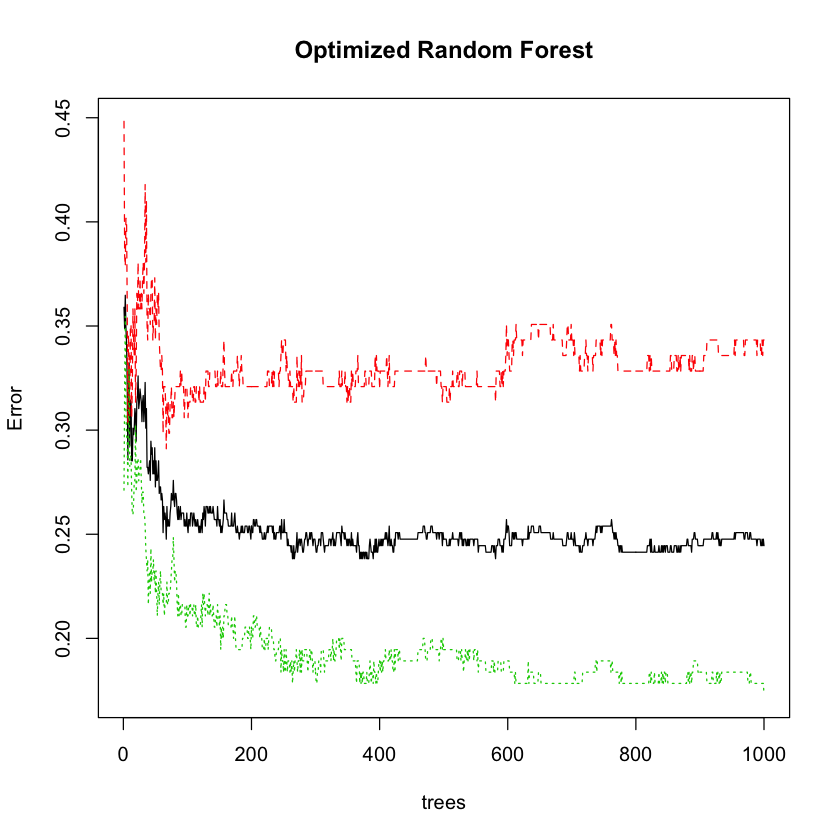

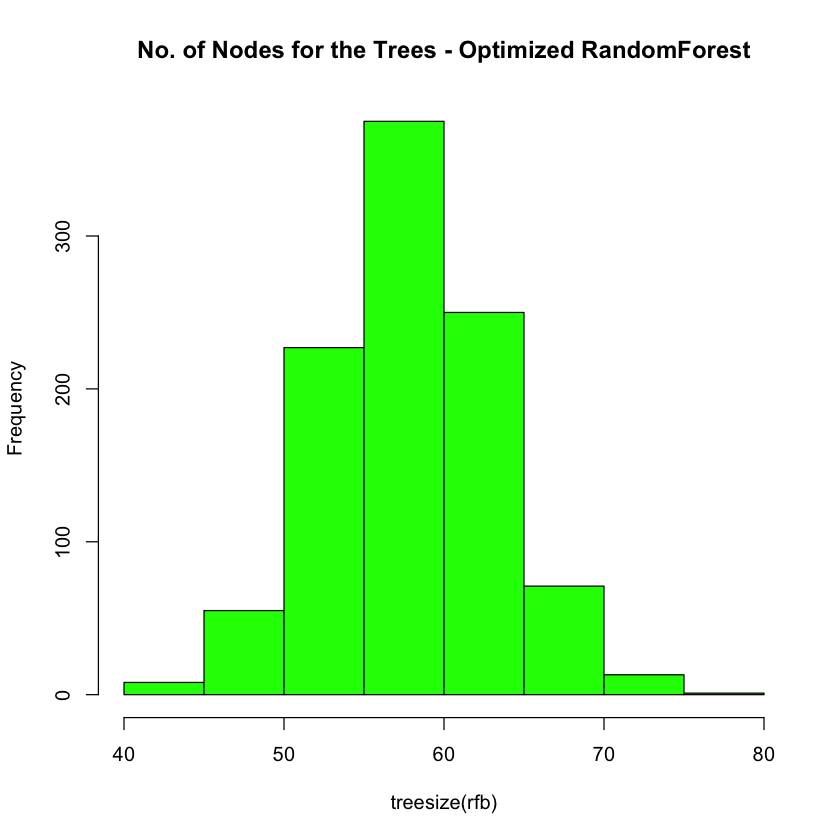

In [151]:
rf = randomForest(quality ~ ., 
                  data=wine_train, 
                  importance=TRUE, ntree=501, confusion=TRUE, err.rate=TRUE,
                  parms=list(split="gini"), proximity = TRUE) 
print(rf)
varImpPlot(rf, main = "Original Random Forest")
plot(rf, main = 'Original Random Forest')

rfortr <- predict(rf, newdata = wine_train, type = "class")
rforts <- predict(rf, newdata = wine_test, type = "class")

#Confusion Matrix
# Train
cmrftr <- confusionMatrix(as.factor(rfortr), wine_train$quality)
print(cmrftr)
accrftr <- cmrftr$overall["Accuracy"]
print(paste('RF Original Train Error = ', round(1 - accrftr['Accuracy'],4)))

# Test
cmrfts <- confusionMatrix(as.factor(rforts), wine_test$quality)
print(cmrfts)
accrfts <- cmrfts$overall["Accuracy"]
print(paste('RF Original Test Error = ', round(1 - accrfts['Accuracy'],4)))

#Optimization mtry
mtry <- tuneRF(wine_train[,1:11],wine_train$quality, ntreeTry=1000,
               stepFactor=1.5,improve=0.01, trace=TRUE, plot=TRUE)

best.m <- mtry[mtry[, 2] == min(mtry[, 2]), 1]
print(mtry)
print(paste('Best mtry = ', best.m))

rfb <-randomForest(quality ~ .,
                   data=wine_train, 
                   importance=TRUE, ntree=1000, mtry= best.m,
                   confusion=TRUE, err.rate=TRUE, parms=list(split="gini"), 
                   proximity = TRUE)
print(rfb)
varImpPlot(rfb, main = "Optimized Random Forest", sort = TRUE)

plot(rfb, main = 'Optimized Random Forest')

hist(treesize(rfb),
     main = "No. of Nodes for the Trees - Optimized RandomForest",
     col = "green")


In [152]:
#Optimized RF
rforoptr <- predict(rfb, newdata = wine_train, type = "class")
rforopts <- predict(rfb, newdata = wine_test, type = "class")

# Train
cmrfbtr <- confusionMatrix(as.factor(rforoptr), wine_train$quality)
print(cmrfbtr)
accrfbtr <- cmrfbtr$overall["Accuracy"]
print(paste('RF Optimized Train Error = ', round(1 - accrfbtr['Accuracy'],4)))


# Test
cmrfbts <- confusionMatrix(as.factor(rforopts), wine_test$quality)
print(cmrfbts)
accrfbts <- cmrfbts$overall["Accuracy"]
print(paste('RF Optimized Test Error = ', round(1 - accrfbts['Accuracy'],4)))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 134   0
         1   0 185
                                     
               Accuracy : 1          
                 95% CI : (0.9885, 1)
    No Information Rate : 0.5799     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4201     
         Detection Rate : 0.4201     
   Detection Prevalence : 0.4201     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     
[1] "RF Optimized Train Error =  0"
Confusion Matrix and Statistics

          Reference
Pre

In [153]:
control <- trainControl(method='repeatedcv', 
                        number=10, 
                        repeats=3,
                        search = 'random')

rf_random <- train(quality ~ .,
                   data = wine_train,
                   method = 'rf',
                   metric = 'Accuracy',
                   tuneLength  = 15, 

                   trControl = control)
print(rf_random)

Random Forest 

319 samples
 11 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 287, 287, 288, 287, 287, 288, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   3    0.7471571  0.4776934
   4    0.7419762  0.4670078
   5    0.7430199  0.4696736
   6    0.7400232  0.4641613
   8    0.7409009  0.4654599
   9    0.7357578  0.4547457
  10    0.7305097  0.4440194

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.


In [154]:
importance(rfb)

0         1         MeanDecreaseAccuracy MeanDecreaseGini
fixed.acidity         8.148865  9.334083 12.585291            11.430618       
volatile.acidity     16.452604 10.401976 18.894120            16.196699       
citric.acid           4.230159  7.862547  9.533028            11.048381       
residual.sugar        6.055490  1.233295  5.288295             9.826238       
chlorides             8.080663  6.039082 10.133803            12.962397       
free.sulfur.dioxide   4.408554  1.527612  4.251549             9.437758       
total.sulfur.dioxide 11.953963  8.535855 14.664830            14.798376       
density               9.944922 10.892481 15.256074            14.155264       
pH                    2.953683  8.740439  8.753233            11.335217       
sulphates            20.344905 20.638785 27.375435            19.674805       
alcohol              30.500449 22.294560 34.340397            24.105379

# Decision Tree

Call:
rpart(formula = quality ~ ., data = wine_train, method = "class", 
    model = TRUE, parms = list(split = "gini"), xval = 10)
  n= 319 

          CP nsplit rel error    xerror       xstd
1 0.35820896      0 1.0000000 1.0000000 0.06578670
2 0.07462687      1 0.6417910 0.6417910 0.05914623
3 0.04477612      2 0.5671642 0.6194030 0.05847832
4 0.01741294      3 0.5223881 0.6194030 0.05847832
5 0.01119403      7 0.4402985 0.6865672 0.06038189
6 0.01000000     13 0.3432836 0.7164179 0.06113472

Variable importance
             alcohol     volatile.acidity total.sulfur.dioxide 
                  27                   17                   13 
       fixed.acidity              density          citric.acid 
                  10                    7                    6 
           sulphates  free.sulfur.dioxide                   pH 
                   6                    5                    4 
           chlorides       residual.sugar 
                   3                    2 

Node num

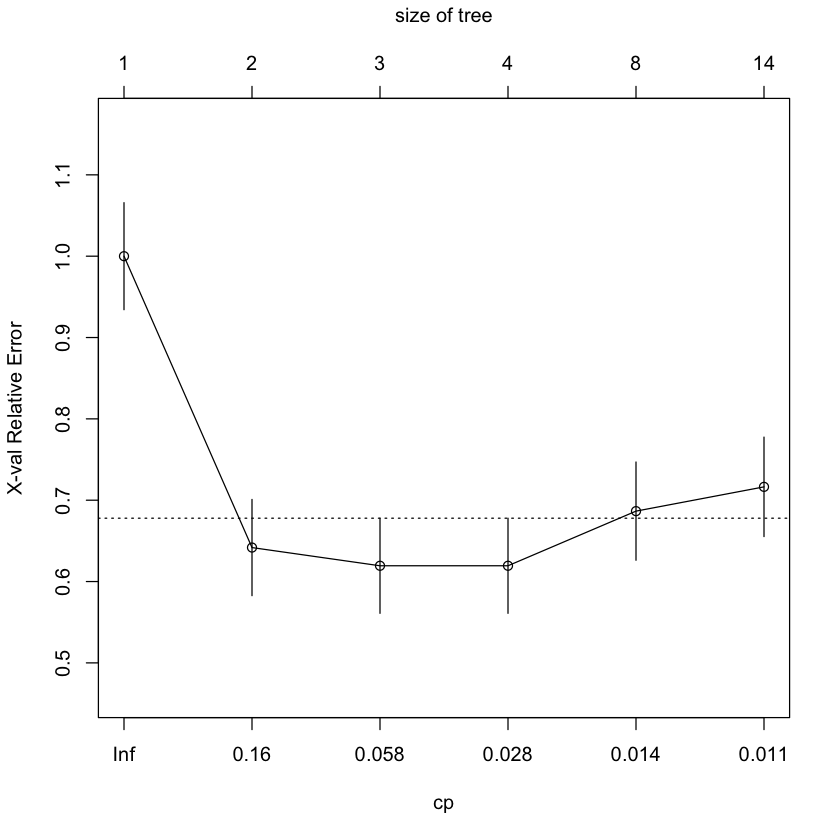

ERROR: Error in fancyRpartPlot(dtnp, uniform = TRUE, main = "Non-Pruned Classification Tree"): не могу найти функцию "fancyRpartPlot"


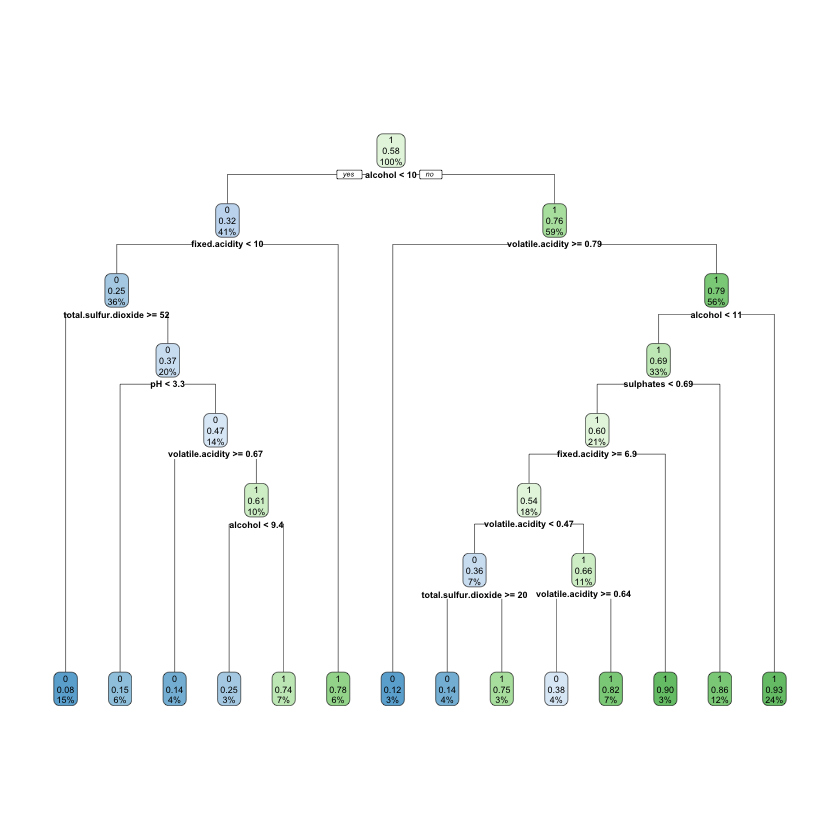

In [155]:

dtnp = rpart(quality ~ ., data=wine_train, 
             method = "class",
             model = TRUE, xval = 10, parms=list(split="gini")) 
print(summary(dtnp))

#Redistribution Error and R-squared
#Training
prednp <- predict(dtnp, newdata = wine_train, type = "class")
mcnp <- table(wine_train$quality, prednp)
err.resub <- round(1.0 - (mcnp[1,1] + mcnp[2,2])/sum(mcnp),3)

print("Non-pruned Tree without CV")
print(paste('Training Redistribution Error = ', err.resub))
printcp(dtnp)
plotcp(dtnp)

rpart.plot(dtnp, yesno = TRUE, extra = 106)
fancyRpartPlot(dtnp, uniform=TRUE, main="Non-Pruned Classification Tree")

#Confusion Matrix
cmdt <- confusionMatrix(as.factor(prednp), wine_train$quality)
accdt <- cmdt$overall["Accuracy"]
print(paste('LG CV Train Error = ', round(1 - accdt['Accuracy'],4)))


Cross validation before pruning

CART 

319 samples
 11 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 287, 288, 288, 286, 287, 287, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.04477612  0.7325513  0.4414546
  0.07462687  0.7270446  0.4353154
  0.35820896  0.6297990  0.1813829

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.04477612.


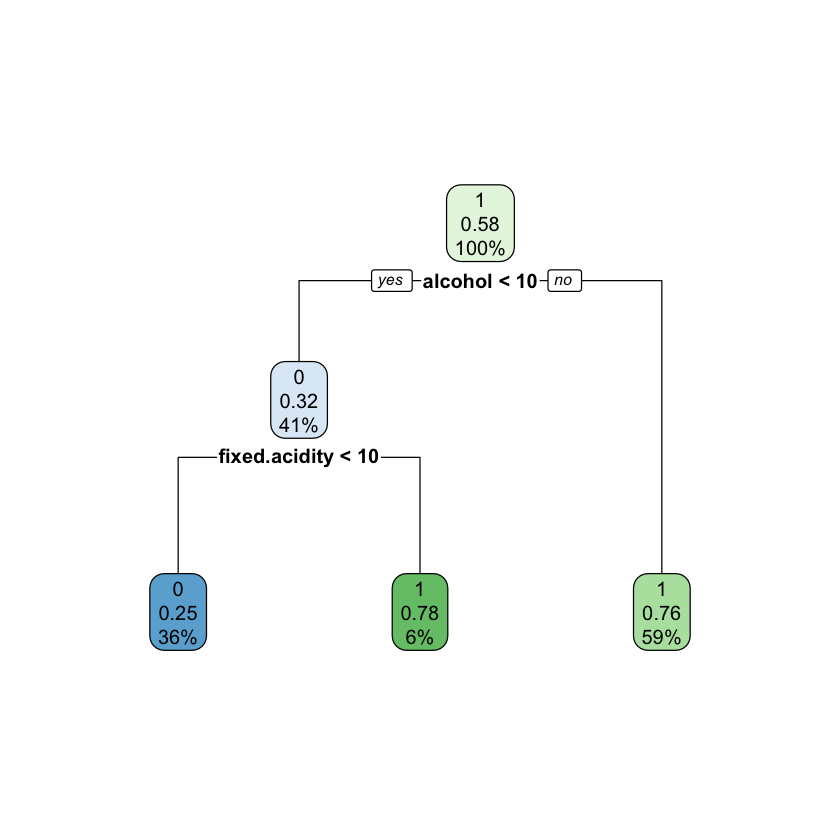

[1] "LG CV Test Error =  0.307"


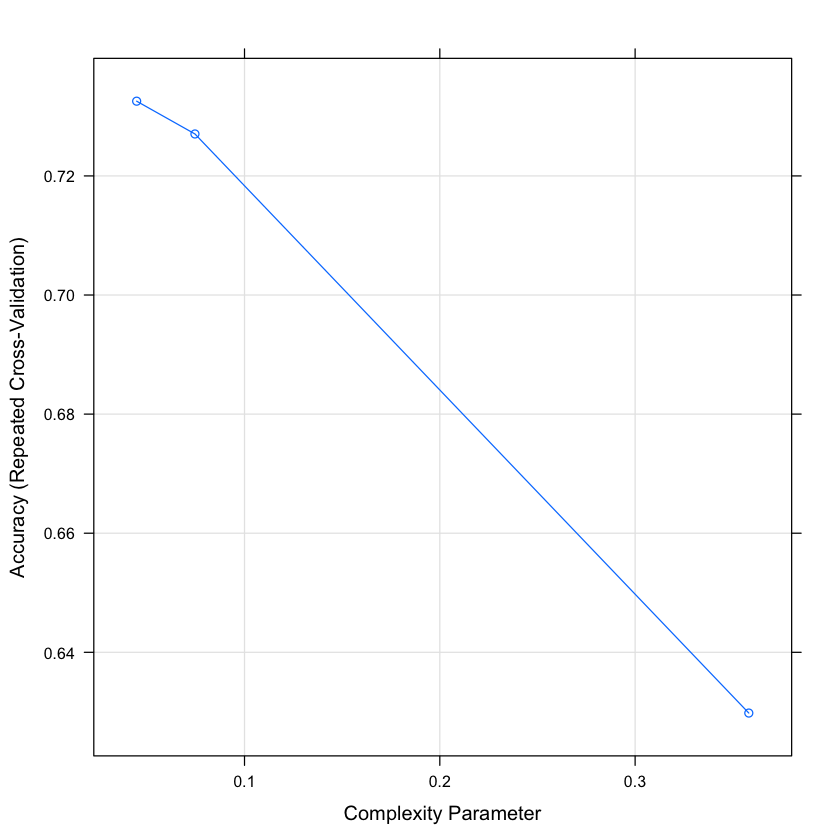

In [156]:

# specify parameters for cross validation
control <- trainControl(method = "repeatedcv", 
                        number = 10, # number of folds
                        repeats = 3, # repeat times
                        search = "grid")
dtcv <- train(quality ~ .,
                       data = wine_train,
                       method = "rpart",
                       trControl = control)
print.train(dtcv)

rpart.plot(dtcv$finalModel, extra = 106)
plot.train(dtcv)

# Test
pred_test <- predict(dtnp, newdata = wine_test, type = "class")

#Confusion Matrix
cmdt_test <- confusionMatrix(as.factor(pred_test), wine_test$quality)
accdtst <- cmdt_test$overall["Accuracy"]
print(paste('LG CV Test Error = ', round(1 - accdtst['Accuracy'],4)))


Pruning

[1] "Optimal cp =  0.0447761194029851"
[1] "DT CV Test Error =  0.3062"
[1] "DT CV Train Error =  0.2382"


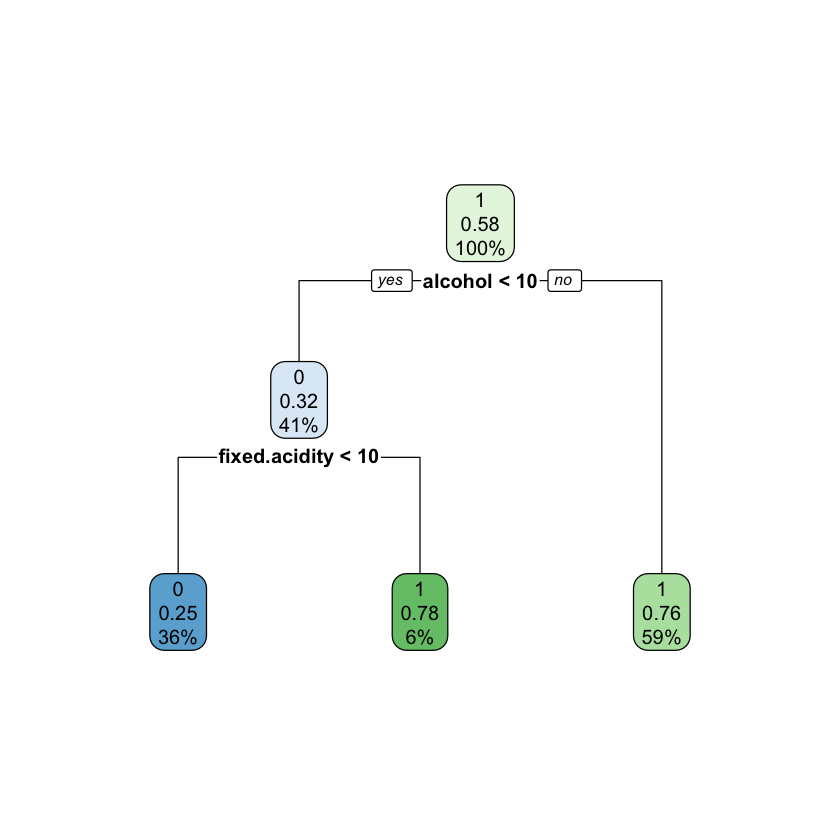

In [157]:

opt <- which.min(dtnp$cptable[, "xerror"]); 
cp1 <- dtnp$cptable[opt, "CP"];
print(paste('Optimal cp = ', cp1))
dtpr <- prune(dtnp,cp=cp1);

#fancyRpartPlot(dtpr, uniform=TRUE, main="Pruned Tree")
dtPrednp <- predict(dtpr, newdata = wine_train, type = "class") 

#Testing
predpr_test <- predict(dtpr, newdata = wine_test, type = "class")

#Confusion Matrix
#Testing
cmdtpr_test <- confusionMatrix(as.factor(predpr_test), wine_test$quality)
accdtstpr <- cmdtpr_test$overall["Accuracy"]
print(paste('DT CV Test Error = ', round(1 - accdtstpr['Accuracy'],4)))

#Confusion Matrix
#Training
cmdtpr <- confusionMatrix(as.factor(dtPrednp), wine_train$quality)
accdtpr <- cmdtpr$overall["Accuracy"]
print(paste('DT CV Train Error = ', round(1 - accdtpr['Accuracy'],4)))

rpart.plot(dtpr, yesno = TRUE)
#fancyRpartPlot(dtpr, uniform=TRUE, main="Pruned Classification Tree")

Implementation of Monte Carlos CV for: Logistic Regression, KNN, SVM, Ordinal Regression, Random Forest, Decision Tree¶

In [158]:
set.seed(7406)

testspl <- 0.2
n = dim(wine)[1]
n1 = round(n * testspl)
B= 100

b_index <- list()
te1 <- list()
te2 <- list()
te3 <- list()
te4 <- list()
te5 <- list()
te6 <- list()
te7 <- list()


for (b in 1:B) {
### randomly select n1 observations as a new training  subset in each loop
  flag <- sort(sample(1:n, n1));
  wine_train_temp <- wine[-flag,];  ## temp training set for CV
  wine_test_temp  <- wine[flag,]; ## temp testing set for CV
    
  b_index <- c(b_index, b)
     
    # Model 1: Logistic Regression with All Predictors
  lgall <- glm(quality ~ ., data = wine_train_temp, family = binomial(link="logit"))
  prediction <- predict(lgall,wine_test_temp[,1:11], type = "response")
  prediction <- ifelse(prediction>= .5, 1,0)
  cm <- confusionMatrix(wine_test_temp$quality, as.factor(prediction))
  te1 <- c(te1,round(cm$overall[['Accuracy']],3))
    
    # Model 2: Logistic Regression with Significant Predictors
  lgselect <- glm(quality ~ .- residual.sugar - fixed.acidity - density - 
                  citric.acid - pH, 
                  data = wine, 
                  family = binomial(link="logit"))
  prediction <- predict(lgselect,wine_test_temp[,1:11], type = "response")
  prediction <- ifelse(prediction>= .5, 1,0)
  cm <- confusionMatrix(wine_test_temp$quality, as.factor(prediction))
  te2 <- c(te2,round(cm$overall[['Accuracy']],3))
    
    # Model 3: Knn at k = 3
  knn <- knn(train=wine_train_temp, test=wine_test_temp, 
             cl=wine_train_temp$quality, k=3)
  cm <- confusionMatrix(wine_test_temp$quality, as.factor(knn))
  te3 <- c(te3,round(cm$overall[['Accuracy']],3))
    
    # Model 4: SVM C = 3
  classifier = svm(formula = quality ~ .,data = wine_train_temp,type = 
                     'C-classification', cost = c_best, kernel = 'radial')
  predictions <- predict(classifier, newdata = wine_test_temp[,1:11])
  cm <- confusionMatrix(wine_test_temp$quality, as.factor(predictions))
  te4 <- c(te4,round(cm$overall[['Accuracy']],3))

    # Model 5: Random Forest - mtry
  rf <- randomForest(quality~., data=wine_train_temp, proximity=TRUE, mtry = best.m) 
  predictions <- predict(rf, wine_test_temp)
  cm <- confusionMatrix(predictions, wine_test_temp$quality)
  te5 <- c(te5,round(cm$overall[['Accuracy']],3))
    
    # Model 6: Decision Tree - cp
  fit <- rpart(quality~., data = wine_train_temp, method = 'class')
  dtpr <- prune(fit,cp=cp1)
  
  predictions <- predict(dtpr, wine_test_temp, type = 'class')
  cm <- confusionMatrix(wine_test_temp$quality, as.factor(predictions))
  te6 <- c(te6,round(cm$overall[['Accuracy']],3))

  
}

TEALL <- data.frame(unlist(te1), unlist(te2), unlist(te3), unlist(te4), 
                    unlist(te5), unlist(te6))

colnames(TEALL) <- c("LogReg", "LogRegSelect", "Knn", "Svm", "RF", "DTree")

results_viz = data.frame(unlist(apply(TEALL, 2, mean)))
results_viz


unlist.apply.TEALL..2..mean..
LogReg       0.74179                      
LogRegSelect 0.74913                      
Knn          0.75220                      
Svm          0.76776                      
RF           0.81840                      
DTree        0.68710

BOOSTING

All variables

[1] 281

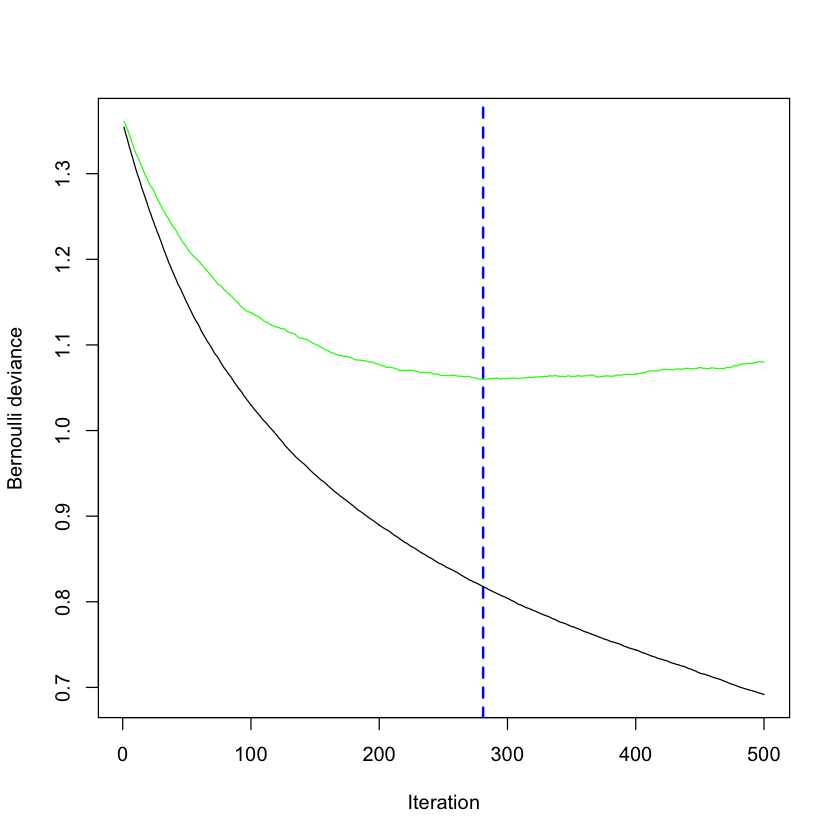

In [159]:
# Boosting
set.seed(7406)

#wine <- rbind(white, red)
wine <- red
wine.pr <- wine[1:11]

#wine <- read.csv(file = "winequality_red.csv", head = TRUE, sep=";")
wine$quality <- ifelse(wine$quality>= 6, 1,0)

#Random sampling
set.seed(7406)

test <- 0.8
ff <- floor((1 - test)*nrow(wine))
ind <- sample(nrow(wine), ff, replace = FALSE)

# Training and Test datasets
wine_train <- wine[ind,]
wine_test <- wine[-ind,]

gbm.train <- gbm(quality ~ .,
                 data=wine_train,
                 distribution = 'bernoulli',
                 n.trees = 500, 
                 shrinkage = 0.01, 
                 interaction.depth = 3,
                 cv.folds = 5,
                 n.cores = NULL,verbose = FALSE)
                  
## Model Inspection 
## Find the estimated optimal number of iterations
perf_gbm1 = gbm.perf(gbm.train, method="cv") 
perf_gbm1

var                  rel.inf  
alcohol              alcohol              26.830706
sulphates            sulphates            17.951417
volatile.acidity     volatile.acidity     10.954048
total.sulfur.dioxide total.sulfur.dioxide  8.021901
chlorides            chlorides             7.581519
pH                   pH                    6.381061
density              density               6.001086
fixed.acidity        fixed.acidity         5.389601
residual.sugar       residual.sugar        4.237370
citric.acid          citric.acid           4.205721
free.sulfur.dioxide  free.sulfur.dioxide   2.445569

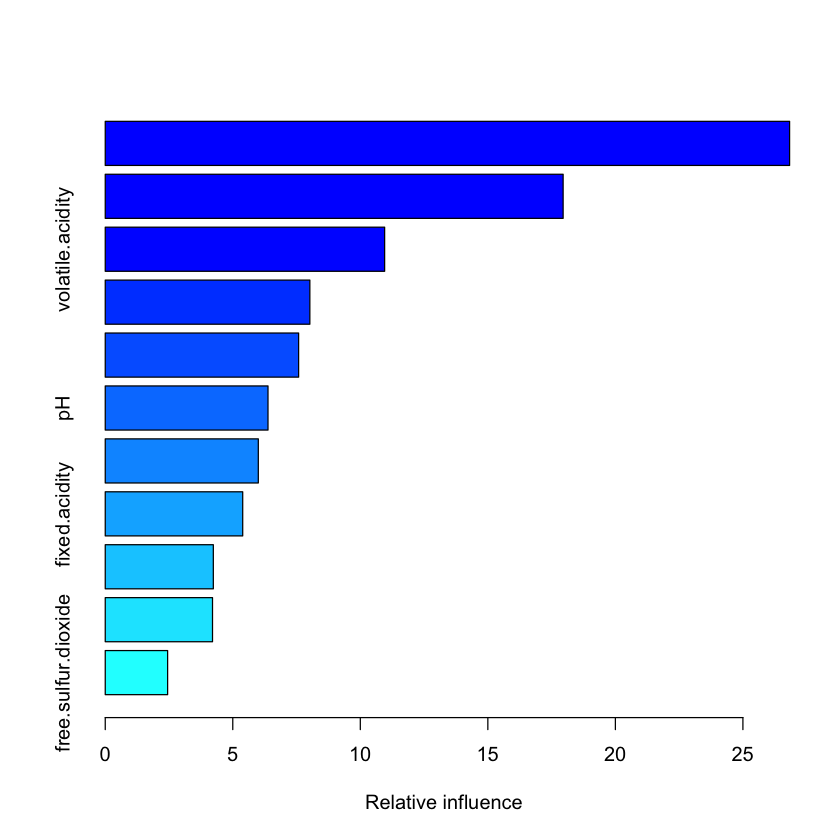

In [160]:
summary(gbm.train)

In [161]:
## Training error
pred1gbm <- predict(gbm.train,newdata = wine_train, n.trees=perf_gbm1, type="response")

y1hat <- ifelse(pred1gbm < 0.5, 0, 1)

bst_train_err <- round(mean(y1hat != wine_train$quality),4)
print(paste('Boost Training Error = ', bst_train_err))

## Testing Error
y2hat <- ifelse(predict(gbm.train,newdata = wine_test, n.trees=perf_gbm1, type="response") < 0.5, 0, 1)
bst_test_err <- round(mean(y2hat != wine_test$quality),4)
print(paste('Boost Testing Error = ', bst_test_err))



[1] "Boost Training Error =  0.2006"
[1] "Boost Testing Error =  0.2586"


Only SIGNIFICANT variables

[1] 236

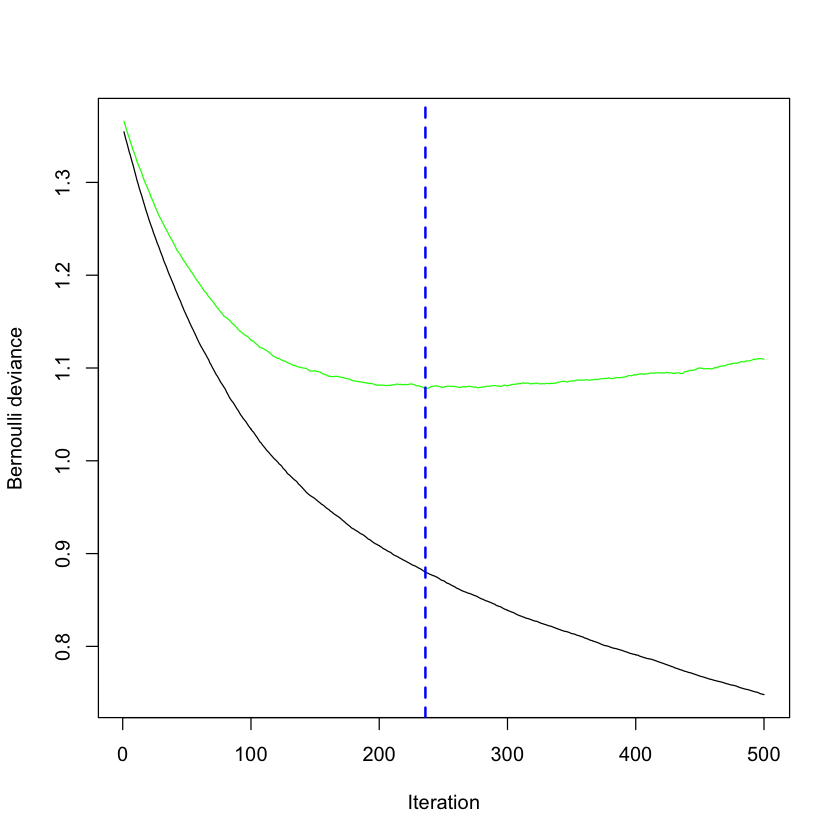

In [162]:
gbm.sig <- gbm(quality ~ . - residual.sugar - fixed.acidity - density - citric.acid - pH,
                 data=wine_train,
                 distribution = 'bernoulli',
                 n.trees = 500, 
                 shrinkage = 0.01, 
                 interaction.depth = 3,
                 cv.folds = 5,
                 n.cores = NULL,verbose = FALSE)
                  
## Model Inspection 
## Find the estimated optimal number of iterations
perf_gbm2 = gbm.perf(gbm.sig, method="cv") 
perf_gbm2

In [163]:
## Training error
pred11gbm <- predict(gbm.sig,newdata = wine_train, n.trees=perf_gbm2, type="response")

y11hat <- ifelse(pred11gbm < 0.5, 0, 1)

bst1_train_err <- round(mean(y11hat != wine_train$quality),4)
print(paste('Boost Training Error = ', bst1_train_err))

## Testing Error
y22hat <- ifelse(predict(gbm.sig,newdata = wine_test, n.trees=perf_gbm2, type="response") < 0.5, 0, 1)
bst2_test_err <- round(mean(y22hat != wine_test$quality),4)
print(paste('Boost Testing Error = ', bst2_test_err))



[1] "Boost Training Error =  0.2163"
[1] "Boost Testing Error =  0.2695"


In [164]:
dim(wine_test_temp)[1]/dim(wine_train_temp)[1]

[1] 0.2501955